In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys

os.chdir("/Users/Bacon/Documents/Current Courses/Hackathon/tiles")

sys.setrecursionlimit(100000)# It sets recursion limit to 10000.

In [2]:
def StarWalk(theImg, curRow, curCol, avgCol, avgRow, numOfPix):
   # print("Walk")
    #First, we start with our recursion break condition
    if theImg[curRow,curCol] ==0:
        return avgCol, avgRow, numOfPix

    # Update recursive variables
    avgCol += curCol      #Adding x and y to the average
    avgRow += curRow
    numOfPix += 1
    theImg[curRow,curCol] = 0


    # We now recurse 
    # Up
    try:
        upAvgCol, upAvgRow, upNumOfPix = StarWalk(theImg, curRow+1, curCol, avgCol, avgRow, numOfPix)
        avgCol =+ upAvgCol
        avgRow =+ upAvgRow
        numOfPix =+ upNumOfPix
    except IndexError:
        pass

      #  print("Edge case")

        
    # Right
    try:
        rightAvgCol, rightAvgRow, rightNumOfPix = StarWalk(theImg, curRow, curCol+1, avgCol, avgRow, numOfPix)
        avgCol =+ rightAvgCol
        avgRow =+ rightAvgRow
        numOfPix =+ rightNumOfPix
    except IndexError:
        pass

       # print("Edge case")
        
    # Left
    try:
        leftAvgCol, leftAvgRow, leftNumOfPix = StarWalk(theImg, curRow, curCol-1, avgCol, avgRow, numOfPix)
        avgCol =+ leftAvgCol
        avgRow =+ leftAvgRow
        numOfPix =+ leftNumOfPix
    except IndexError:
        pass
      #  print("Edge case")
        
    # Down
    try:
        downAvgCol, downAvgRow, downNumOfPix = StarWalk(theImg, curRow-1, curCol, avgCol, avgRow, numOfPix)
        avgCol =+ downAvgCol
        avgRow =+ downAvgRow
        numOfPix =+ downNumOfPix
    except IndexError:
        pass

       # print("Edge case")
        
    # Add the values
    return avgCol, avgRow, numOfPix

In [3]:
def GetDistance(inputimg):############ Thresholding #########
   # print("Getting distances")
    scale = 0.5

    # normalize
    img = (inputimg/np.amax(inputimg)).copy()

    # Threshold
    threshedImg = (img > scale).astype(int) * 255


    ############ Look for stars #########
    totalRows = len(threshedImg)
    totalColumns = len(threshedImg[0])

    curRow = 0
    curCol = 0

    starArray = []

    # Check the rows
    while curRow < totalRows:
      # Check the column

        while curCol < totalColumns:
            # Found a star
            if (threshedImg[curRow,curCol] != 0) :
               # print("\nSTAR")
              # Put together some variables to pass into StarWalk
                averageCol = 0
                averageRow = 0 
                numOfPix = 0

              # Begin the recursive function
                averageCol, averageRow, numOfPix = StarWalk(threshedImg, curRow, curCol, averageCol, averageRow, numOfPix)
               # print("STAR DONE")

              # Take the actual average
                averageCol = averageCol / numOfPix
                averageRow = averageRow / numOfPix

              # Save the values
                starArray.append((averageCol, averageRow, numOfPix))
            curCol+=1

        curRow+=1
        curCol=0


   # print("Star Count:", len(starArray))

    ####### Determine Mutual Distances #######

    # Make arrays for position info
    xVals = []
    yVals = []
    #Extract position data
    for star in starArray:
        xVals.append(star[0])
        yVals.append(star[1])

    # Get the differences
    xDifferences = [abs(i-j) for i in xVals for j in xVals if i != j]
    yDifferences = [abs(i-j) for i in yVals for j in yVals if i != j]

    # Get the actual distances
    index = 0
    distances = []

    ######### Add distance components in quadrature ########
    while index < len(xDifferences) and index < len(yDifferences) :
        
        dist = (xDifferences[index]**2 + yDifferences[index]**2 )**(0.5)
        distances.append(dist)
        index+=1
    return distances



In [4]:
# LOAD TILES FILENAMES
files = os.listdir(os.getcwd())
filepaths = []
for path in files:
    if path.endswith((".jpg")):
        filepaths.append(path)   

# load images
AllTiles =[]
for name in filepaths:
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE).copy()
    AllTiles.append(img)
    
DistancesAndLabels=[]

#Iterate and get all those distances, with the label attached

try:
    os.mkdir("tile_distances")
except FileExistsError:
    print("Already there")
# get current filepath
TileIndex=0
while TileIndex < len(AllTiles):

    filepath = filepaths[TileIndex]
    # Create filename
    index = filepath.find('.')
    label = filepath[:index] + '_distances'

    # Get distances
    distances = GetDistance(AllTiles[TileIndex])
    
    # Save to harddrive
    np.save("tile_distances/"+label, distances)#, delimiter=',')
    DistancesAndLabels.append((label, distances))
    
    TileIndex+=1
print("JOB DONE")

Already there


/Users/Bacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/Bacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


JOB DONE


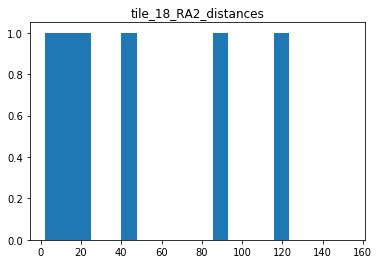

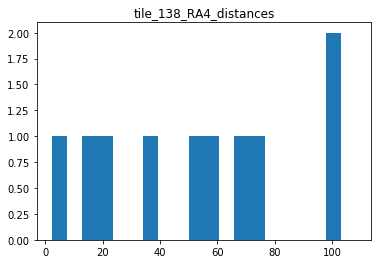

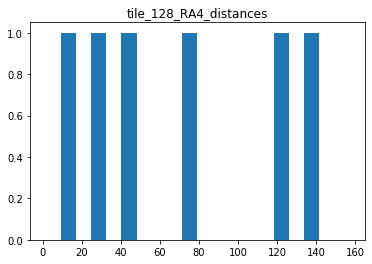

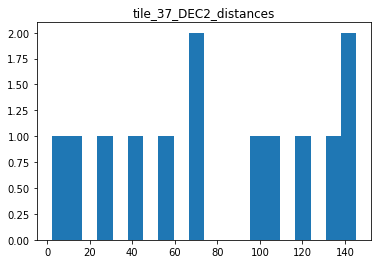

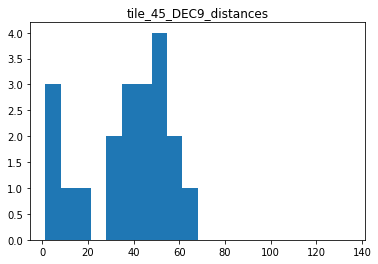

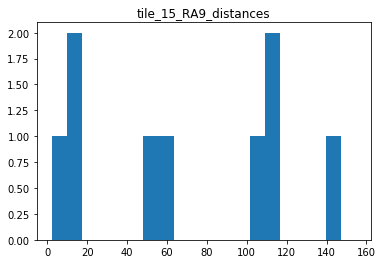

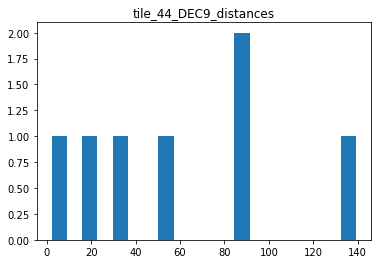

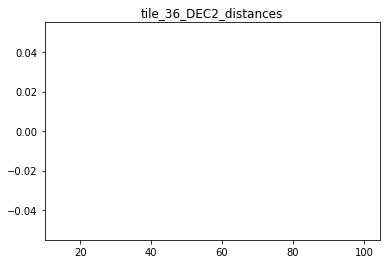

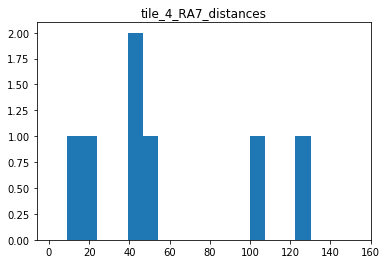

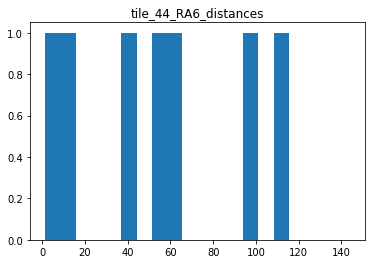

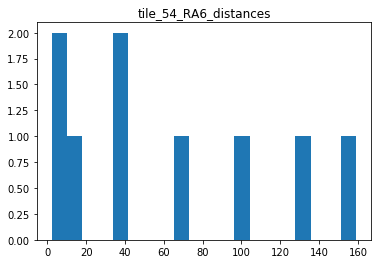

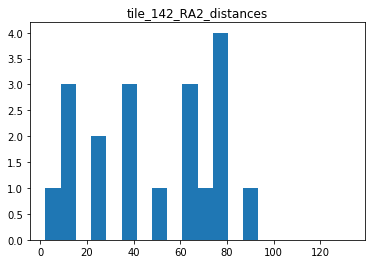

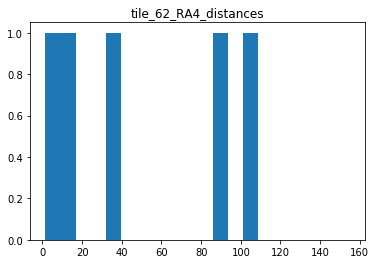

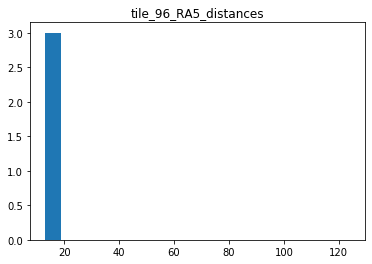

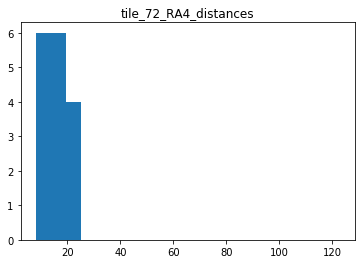

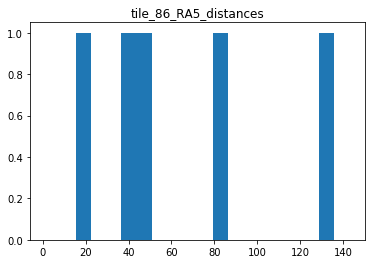

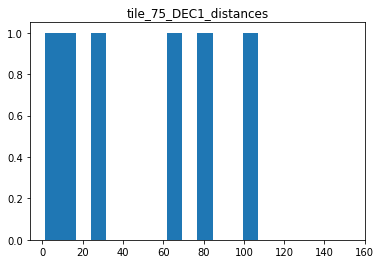

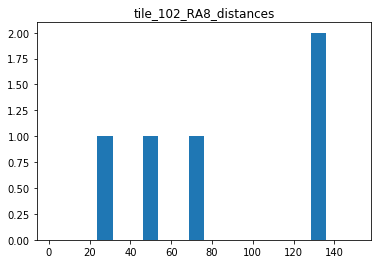

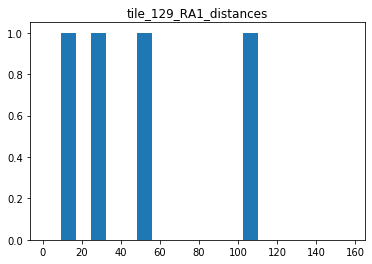

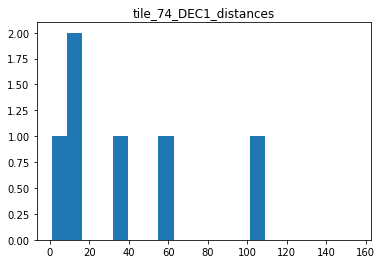

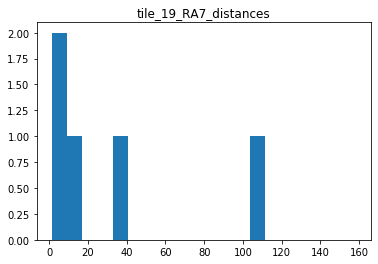

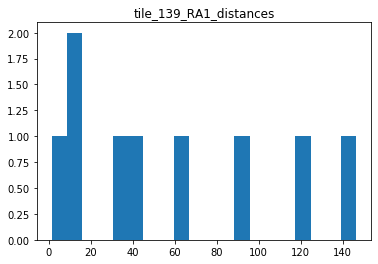

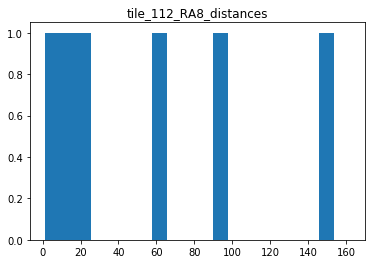

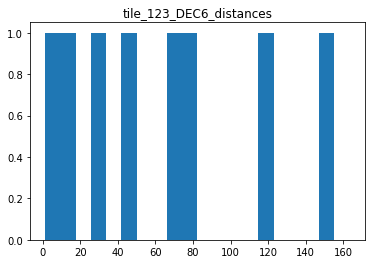

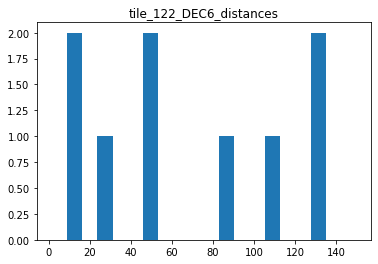

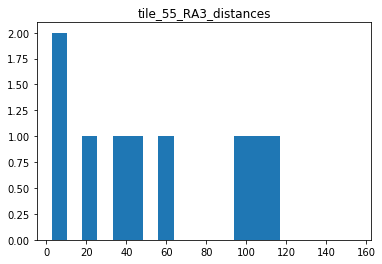

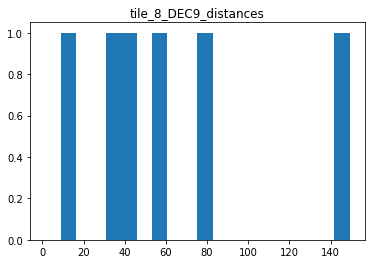

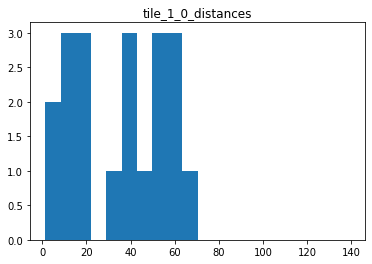

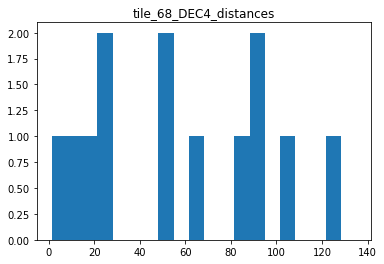

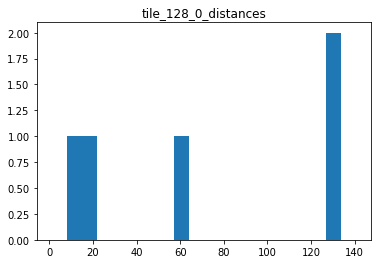

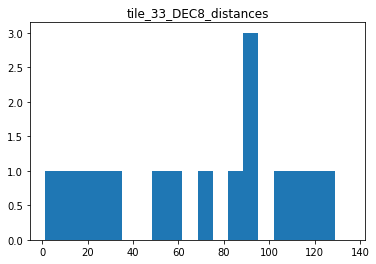

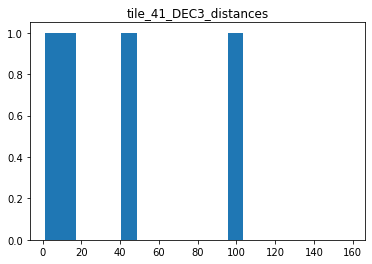

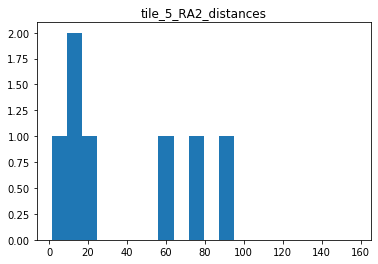

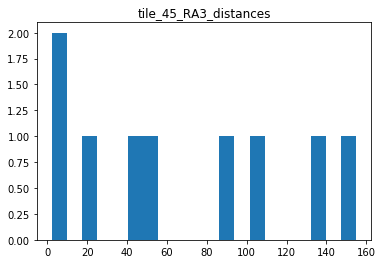

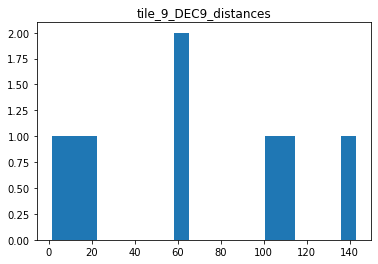

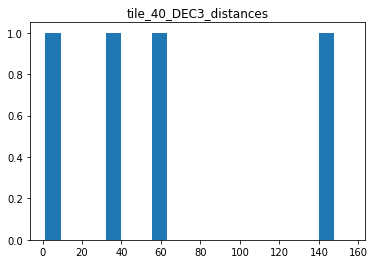

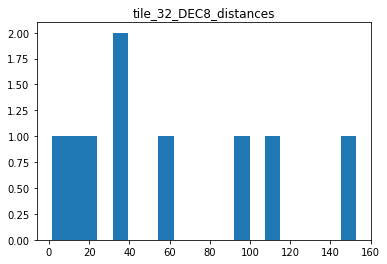

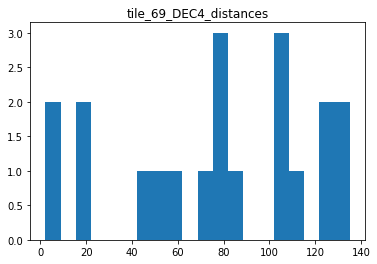

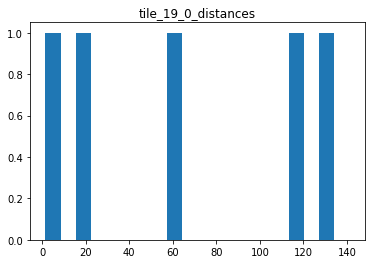

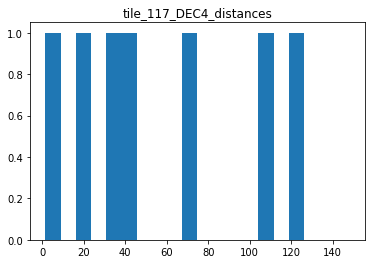

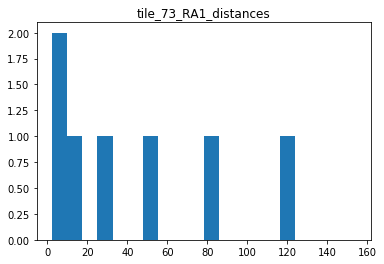

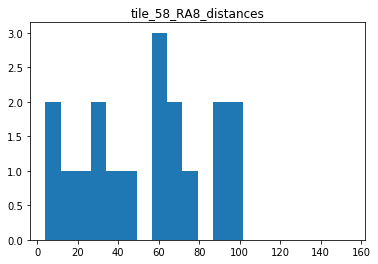

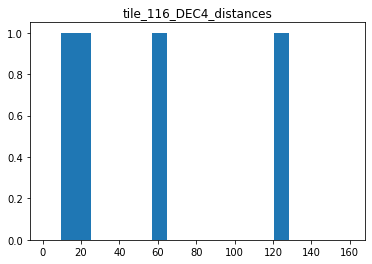

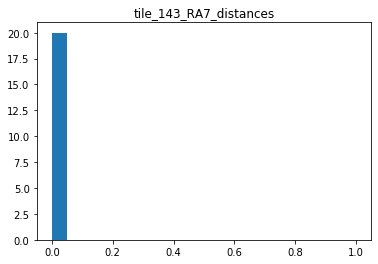

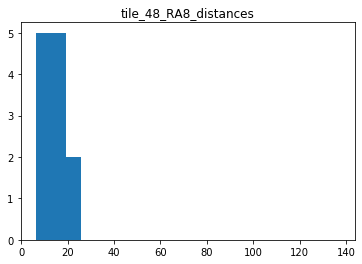

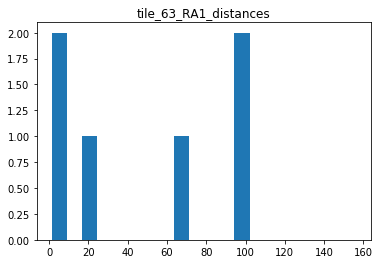

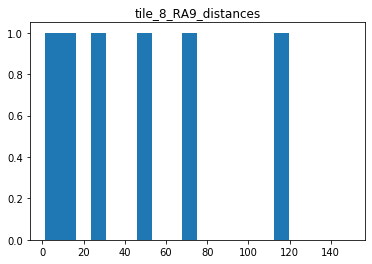

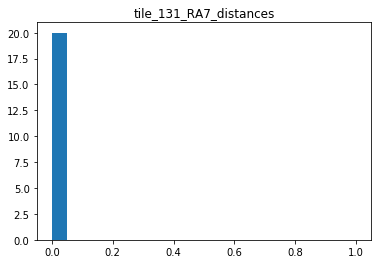

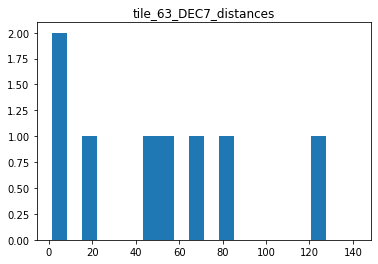

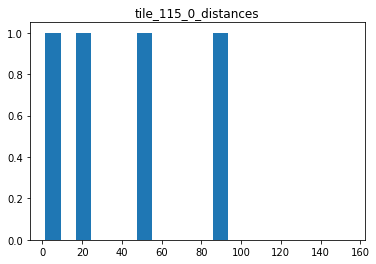

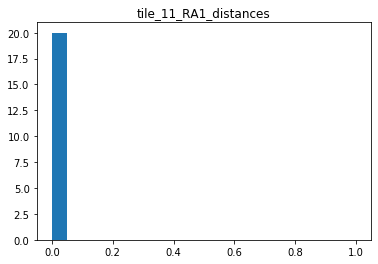

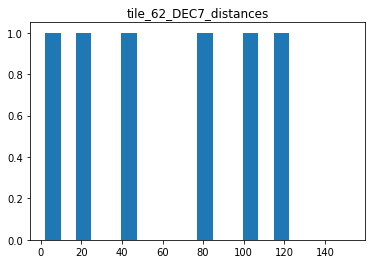

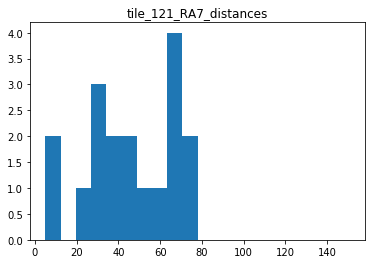

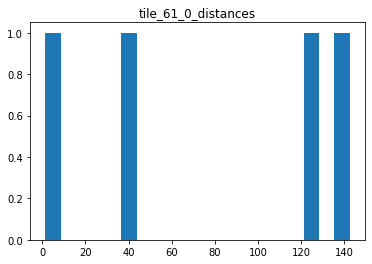

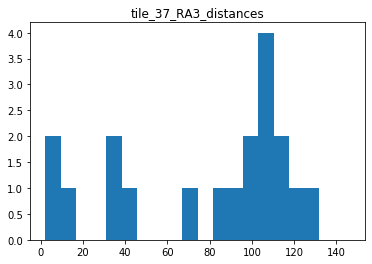

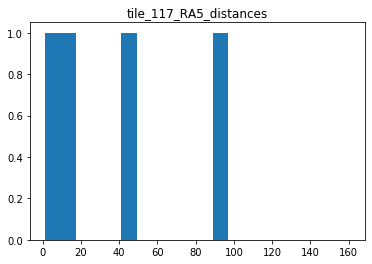

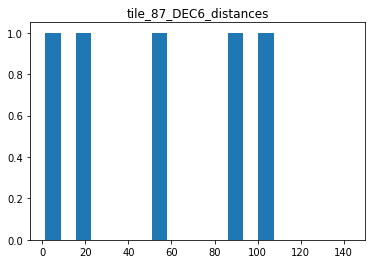

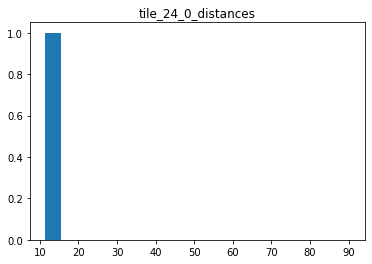

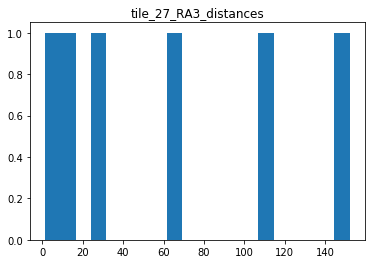

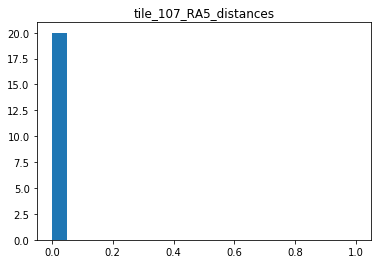

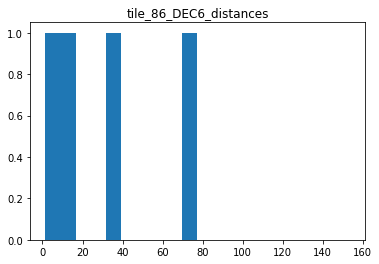

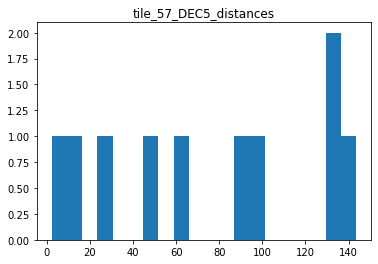

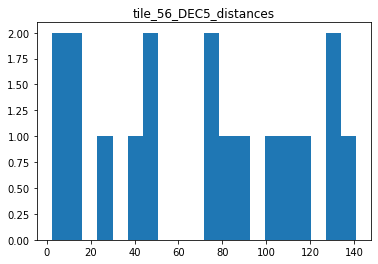

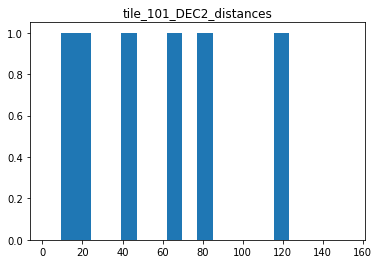

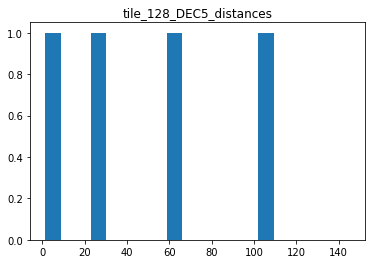

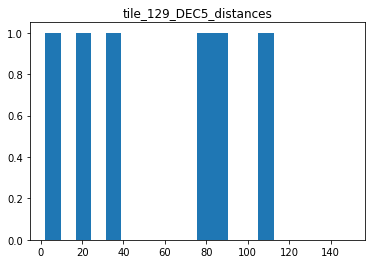

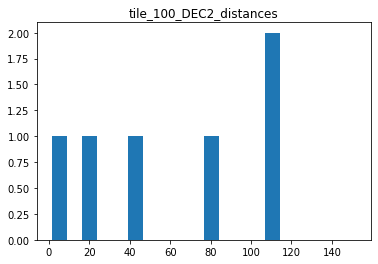

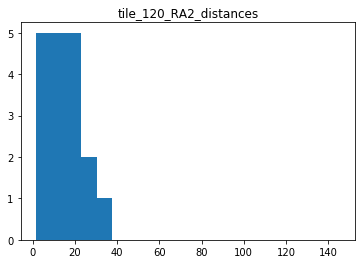

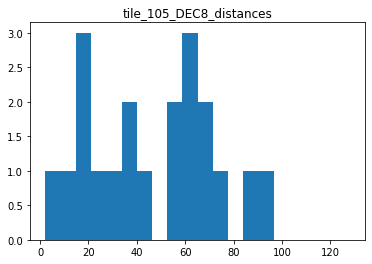

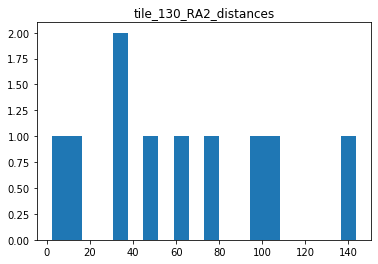

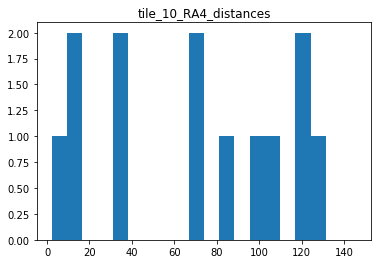

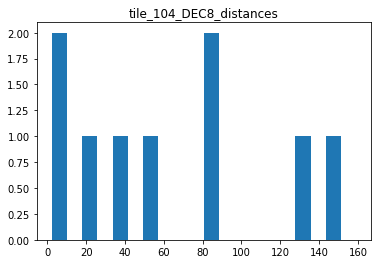

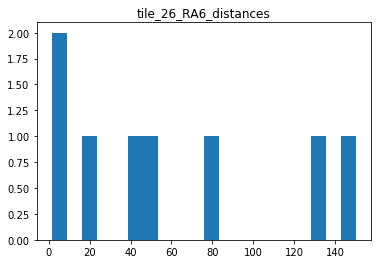

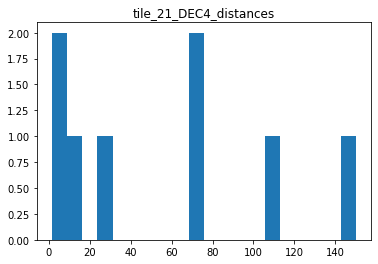

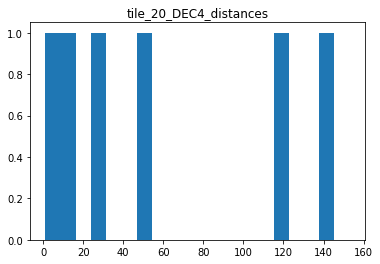

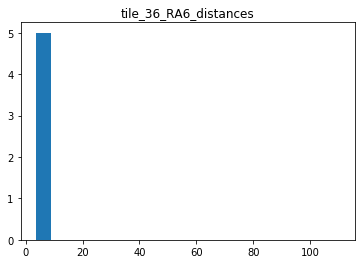

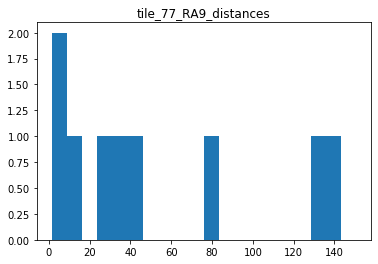

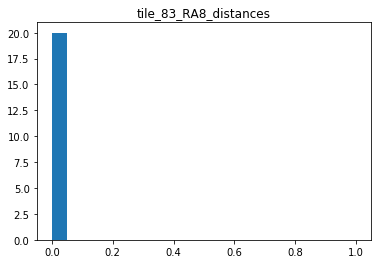

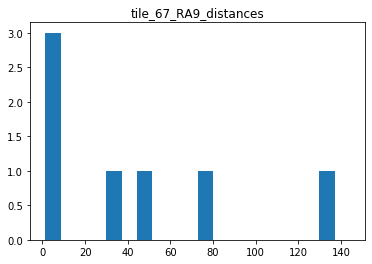

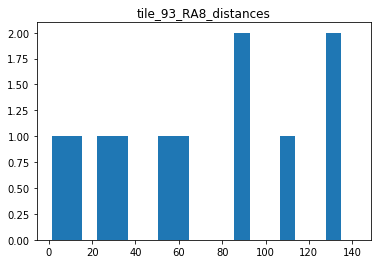

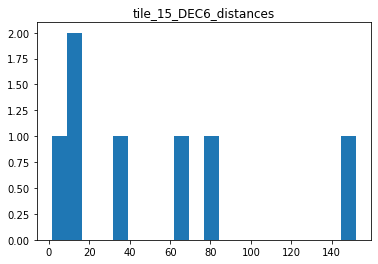

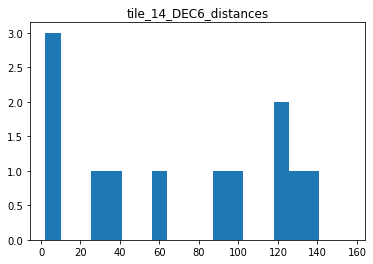

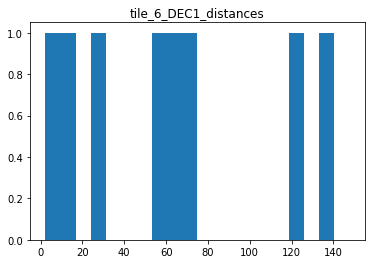

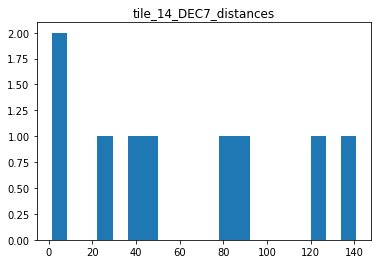

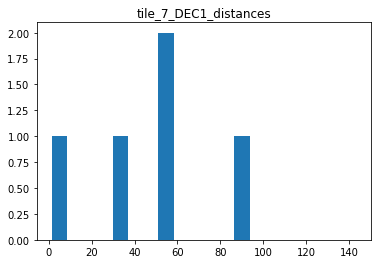

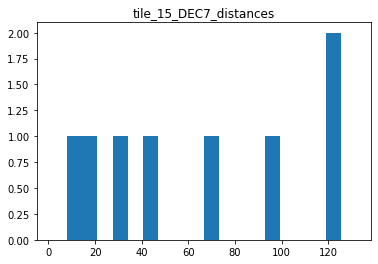

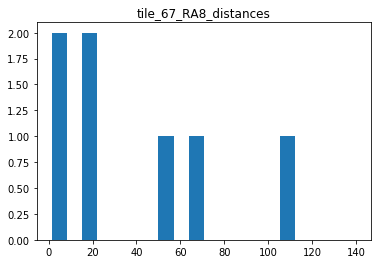

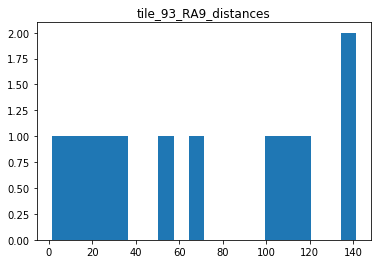

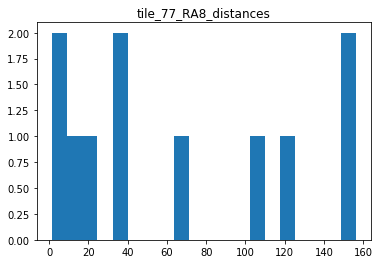

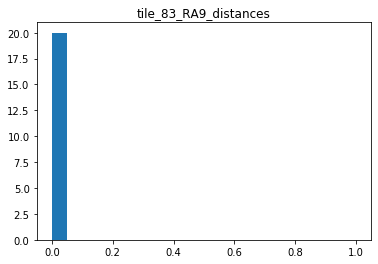

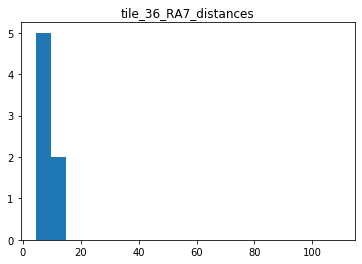

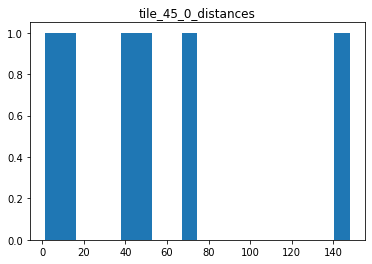

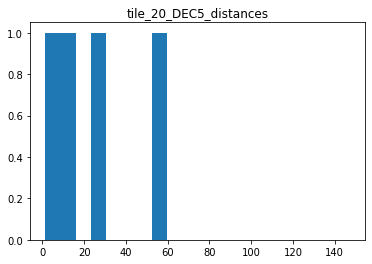

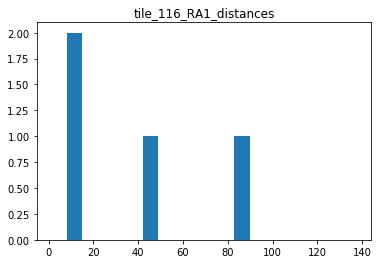

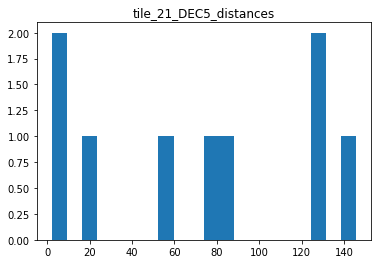

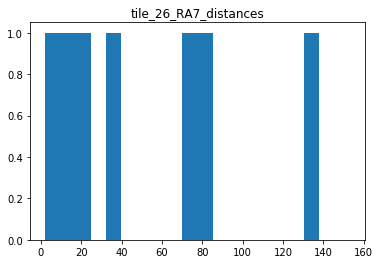

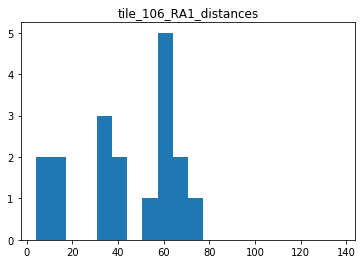

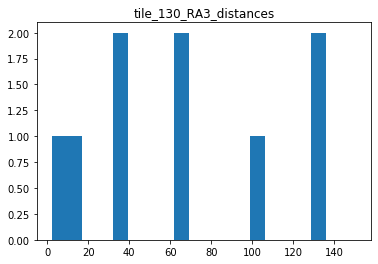

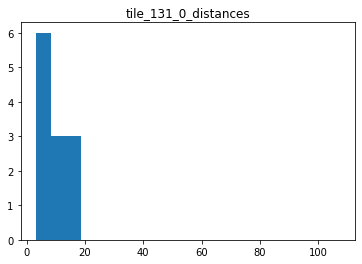

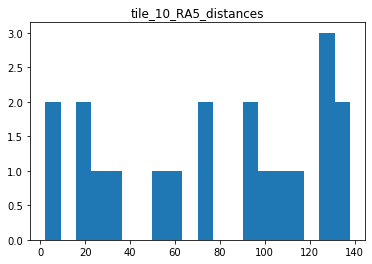

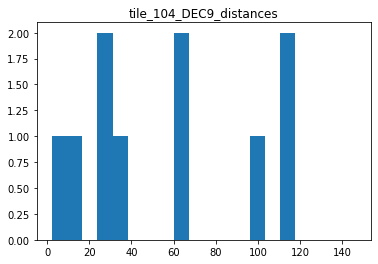

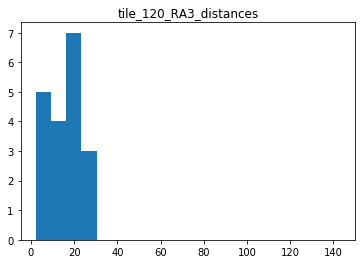

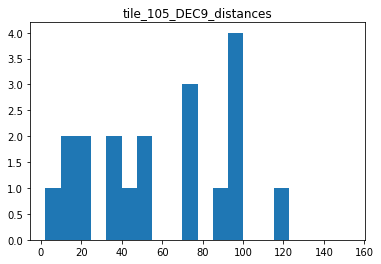

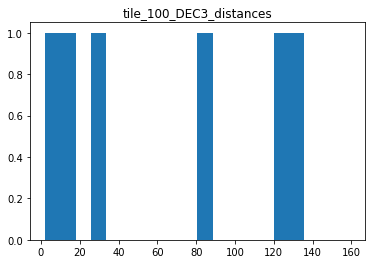

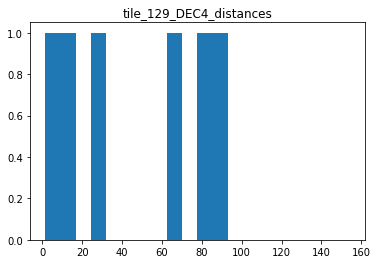

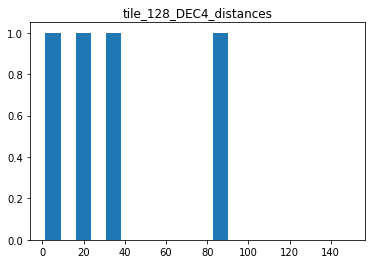

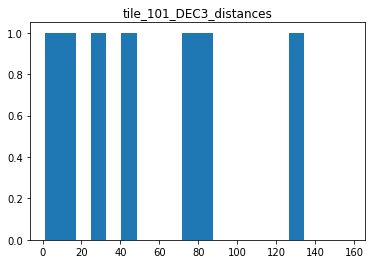

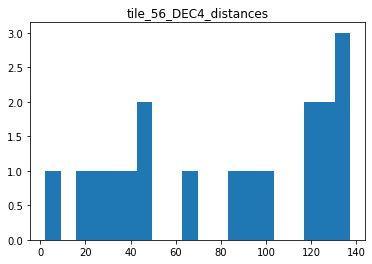

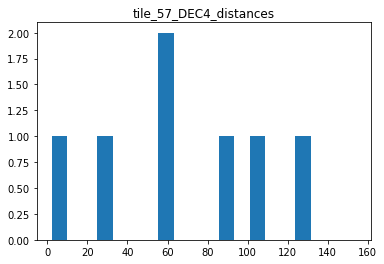

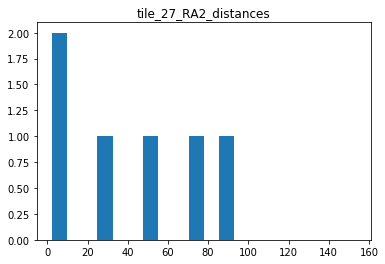

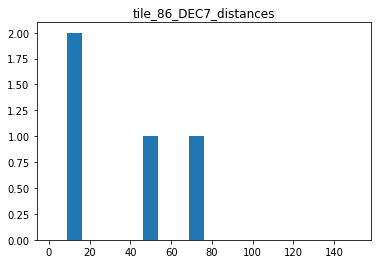

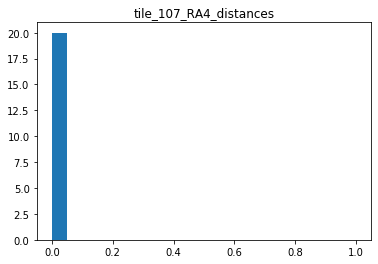

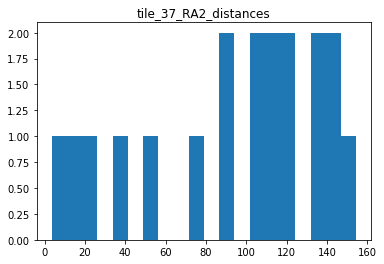

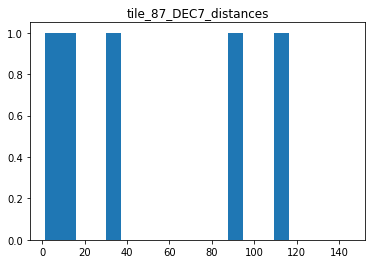

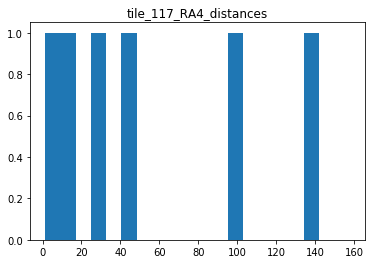

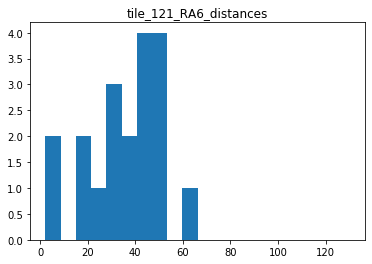

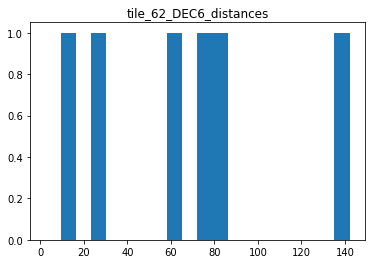

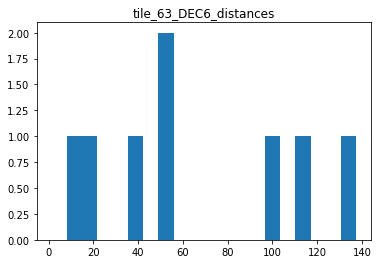

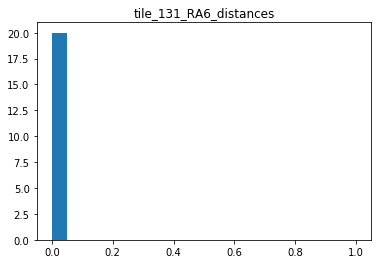

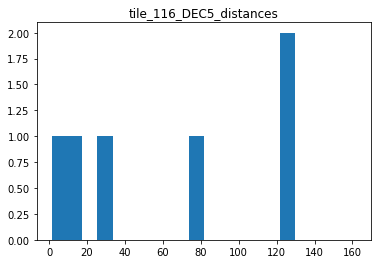

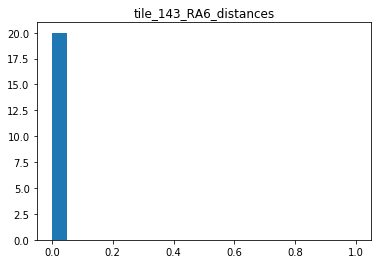

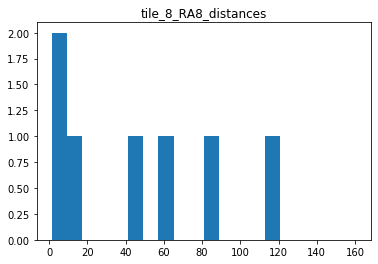

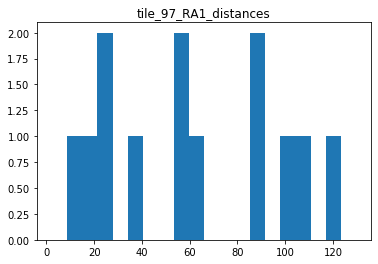

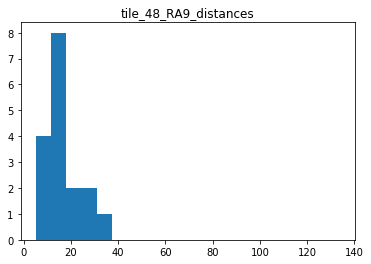

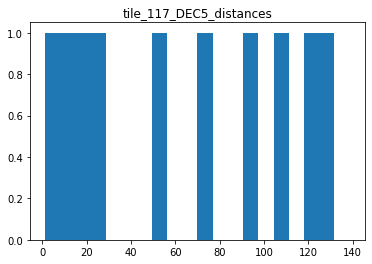

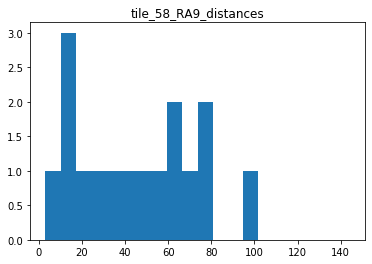

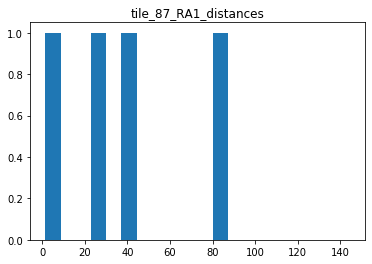

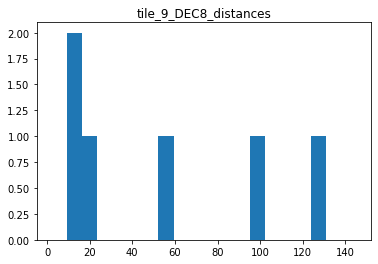

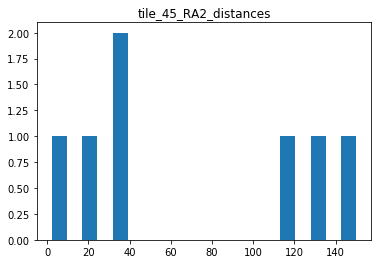

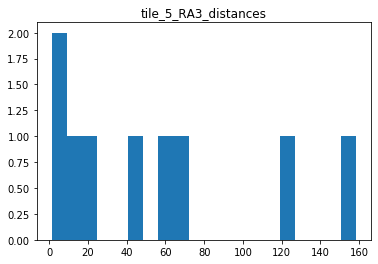

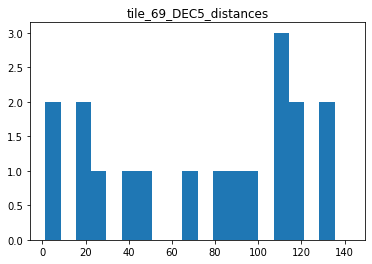

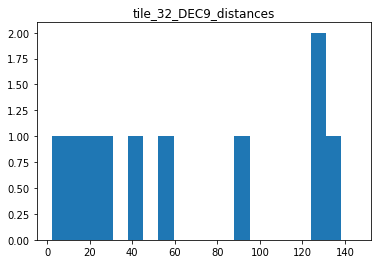

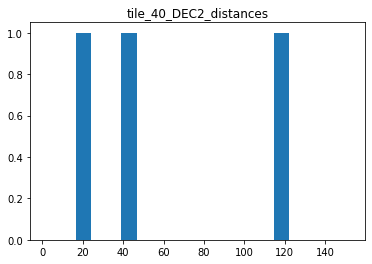

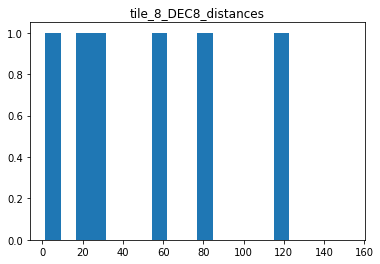

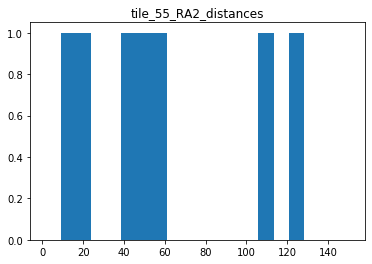

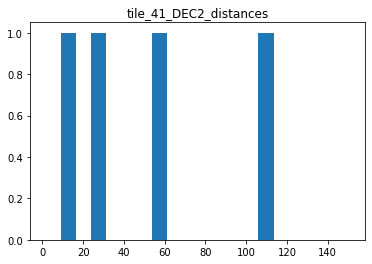

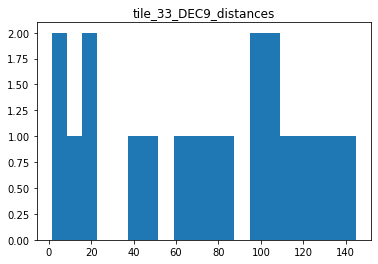

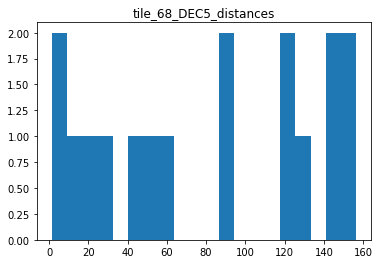

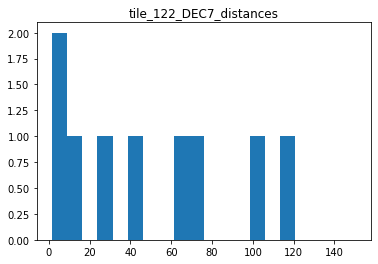

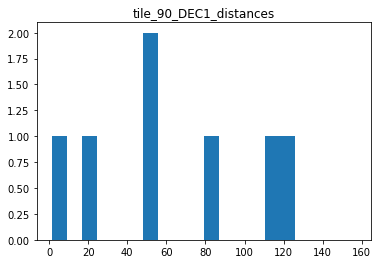

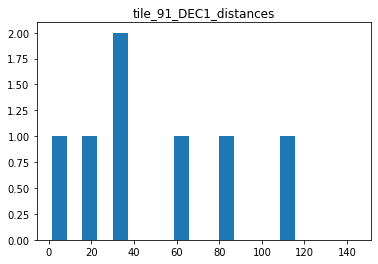

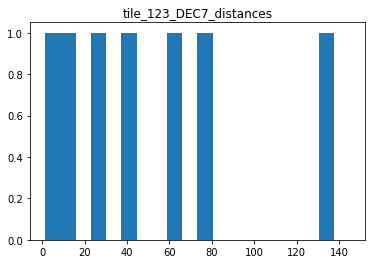

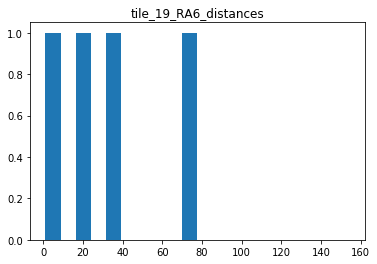

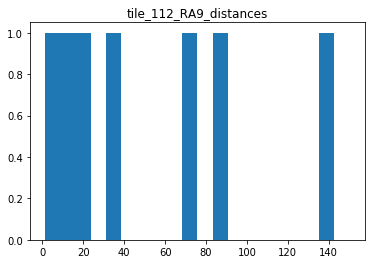

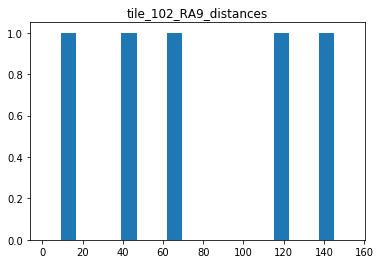

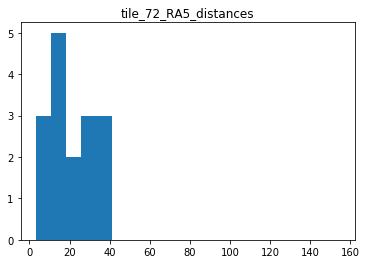

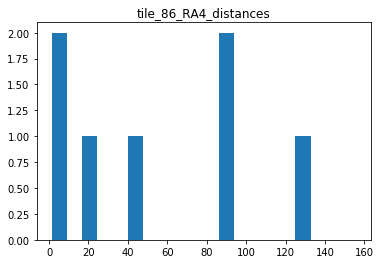

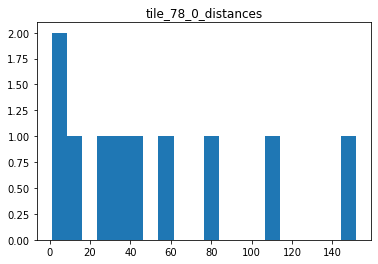

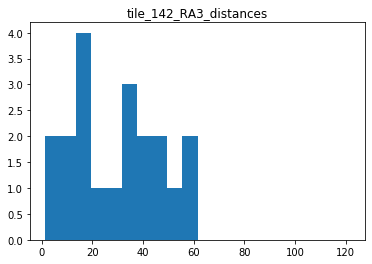

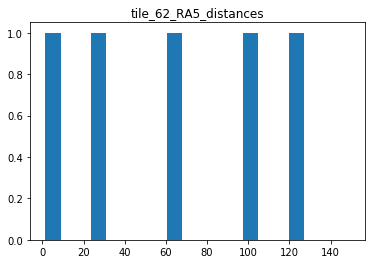

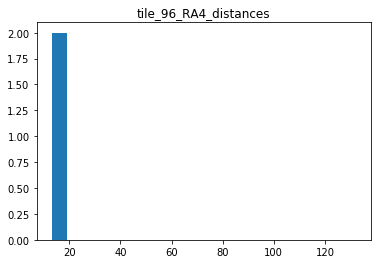

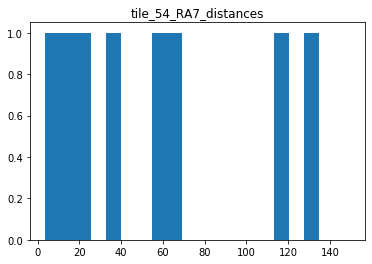

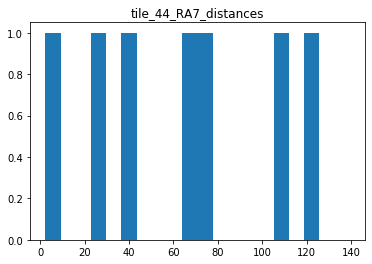

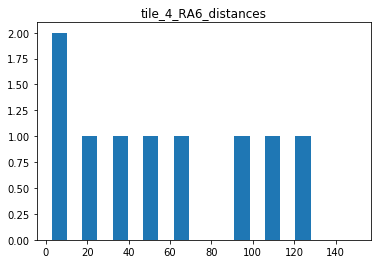

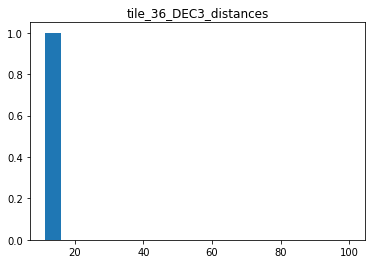

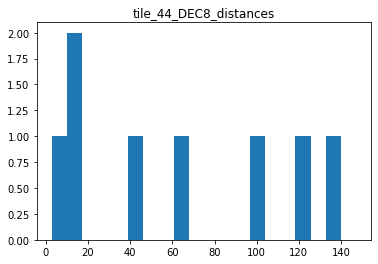

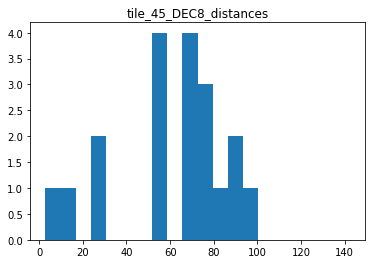

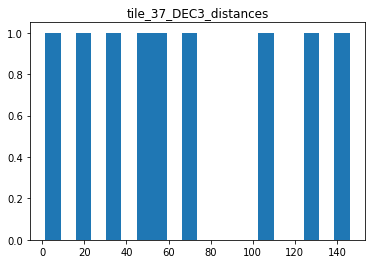

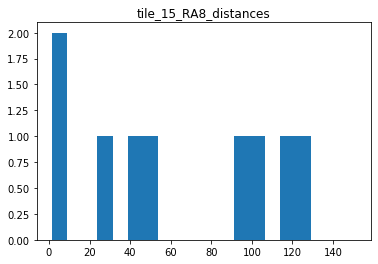

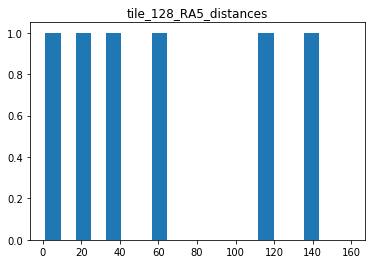

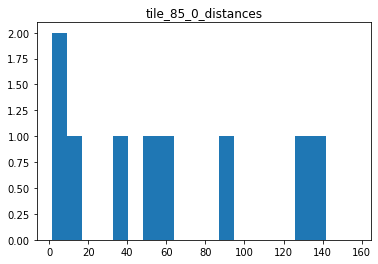

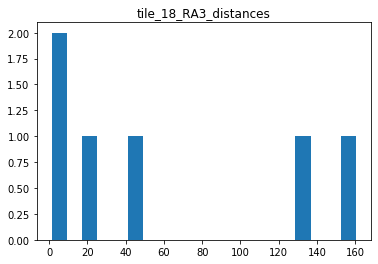

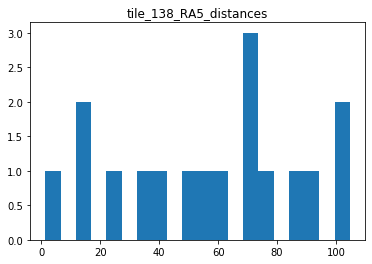

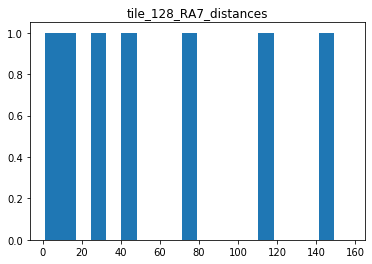

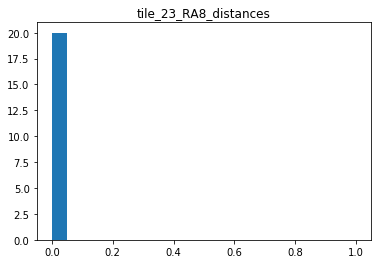

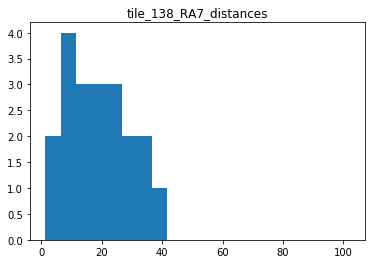

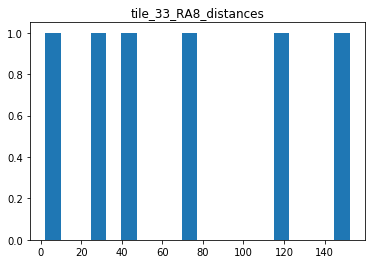

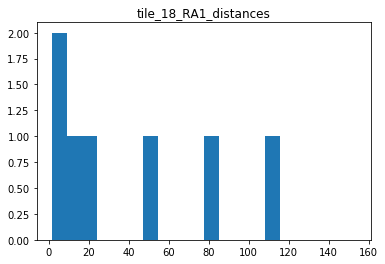

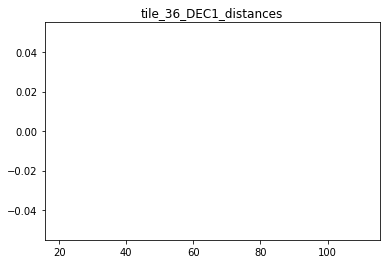

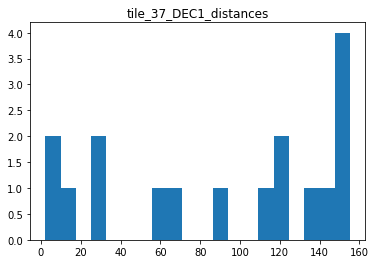

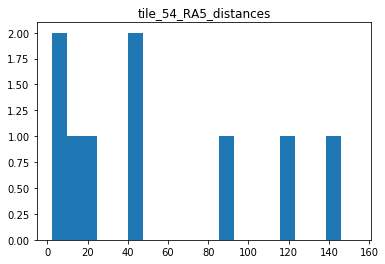

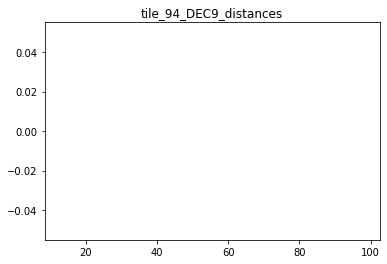

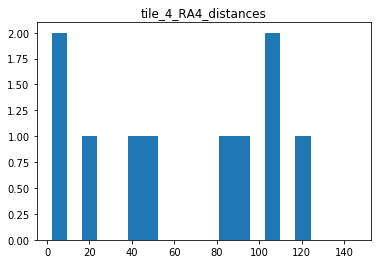

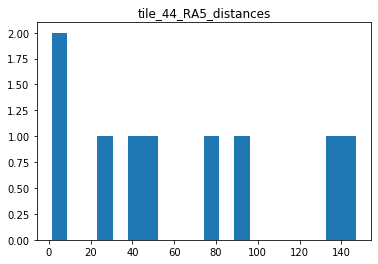

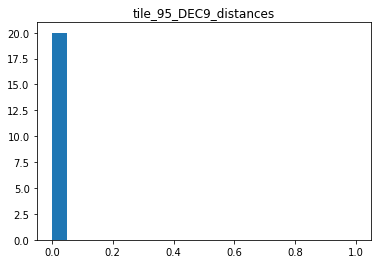

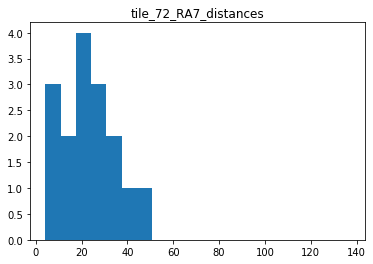

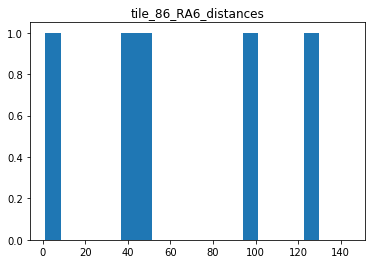

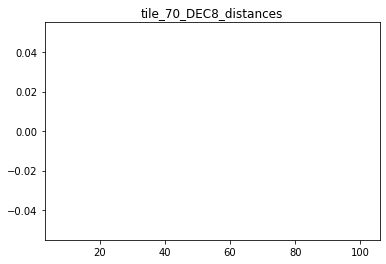

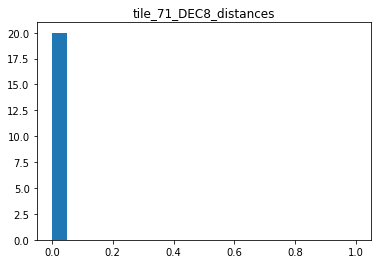

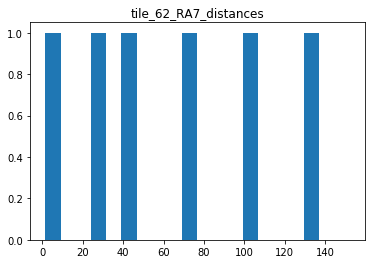

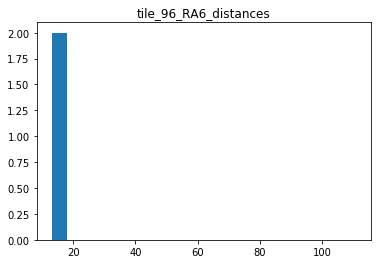

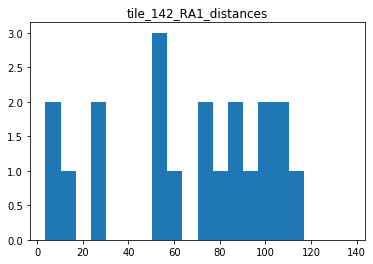

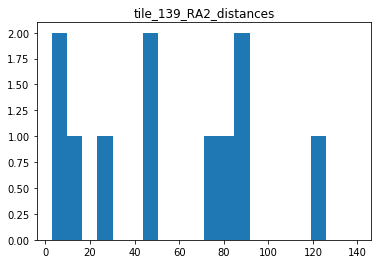

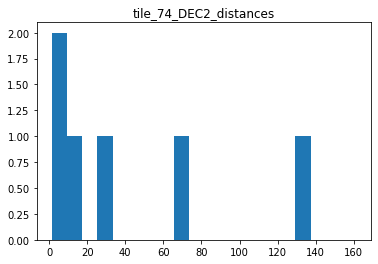

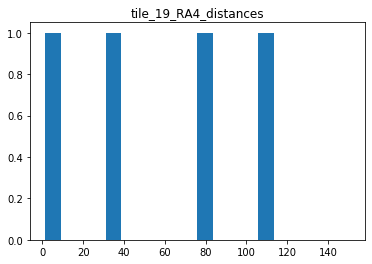

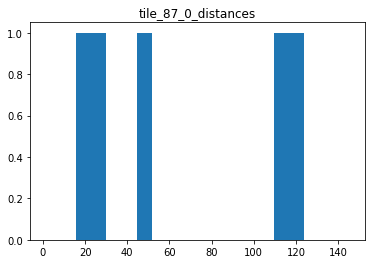

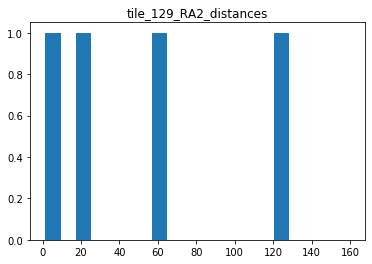

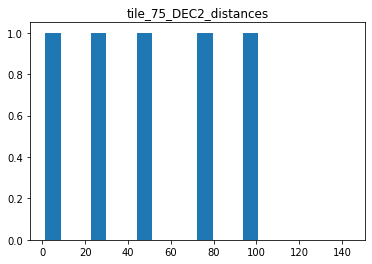

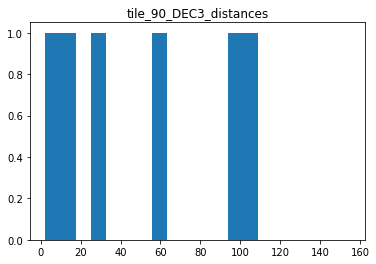

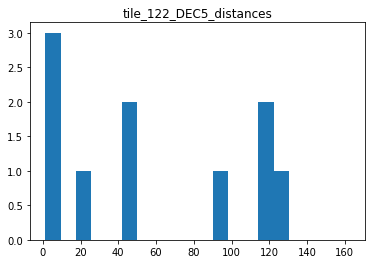

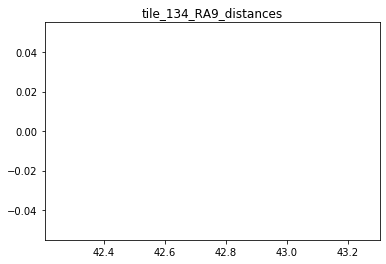

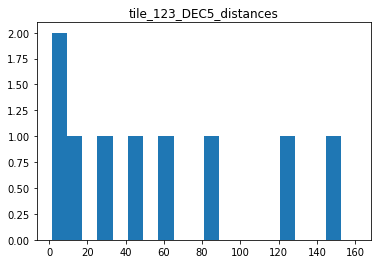

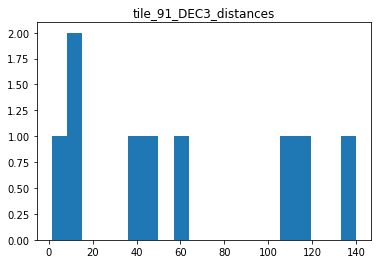

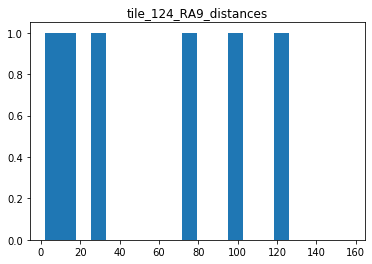

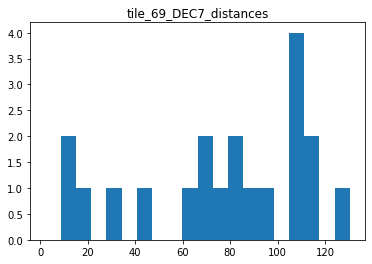

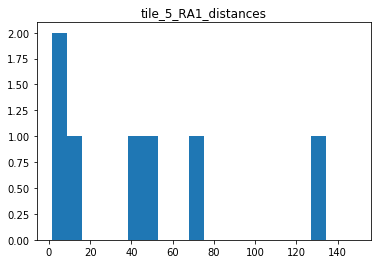

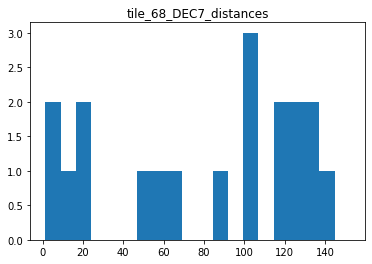

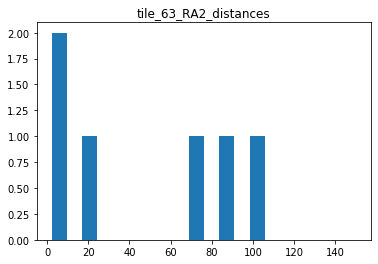

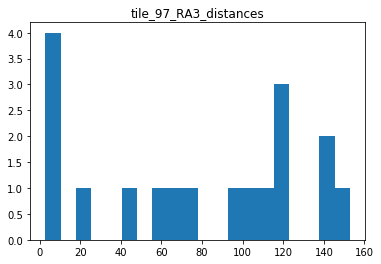

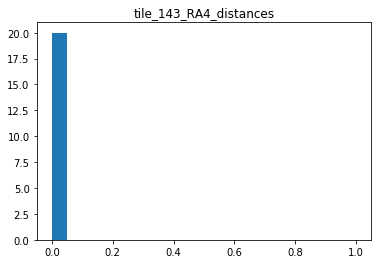

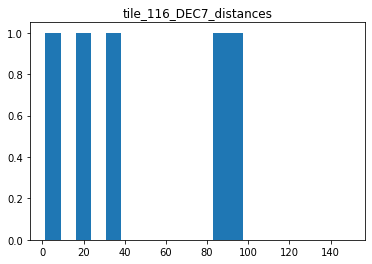

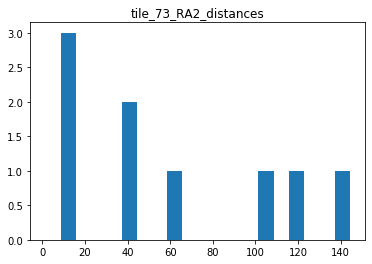

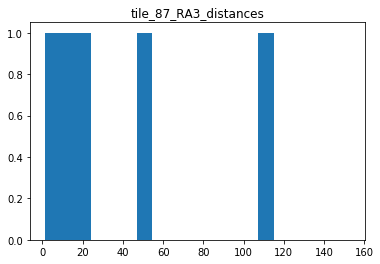

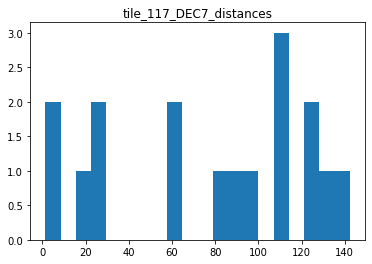

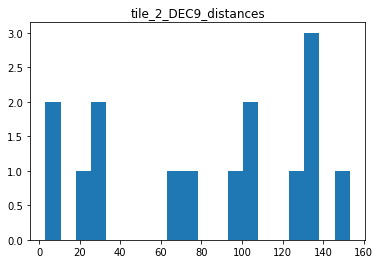

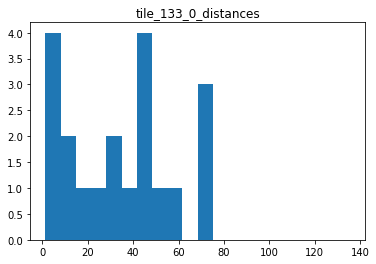

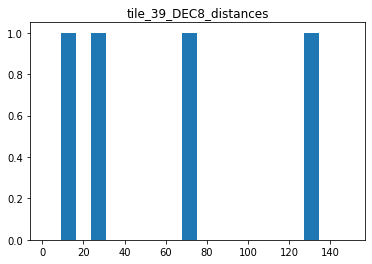

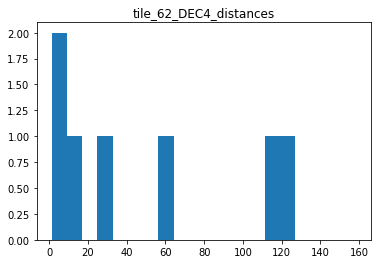

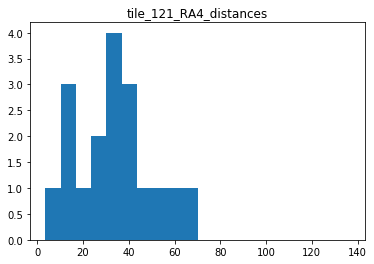

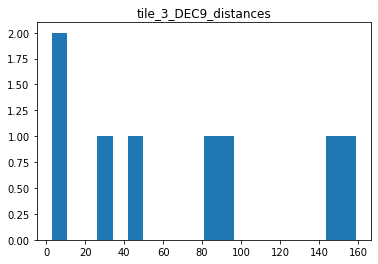

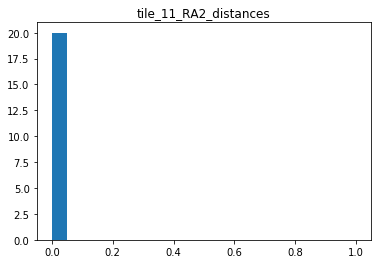

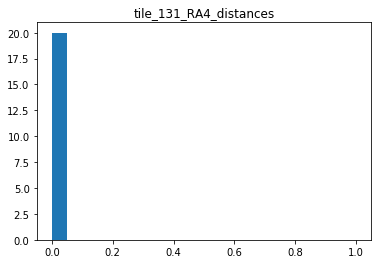

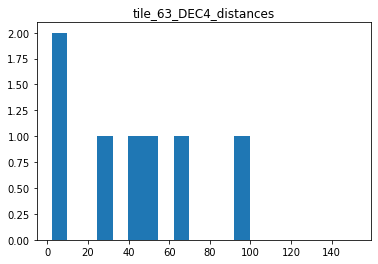

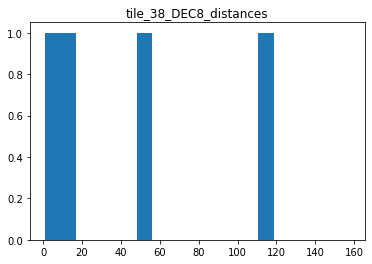

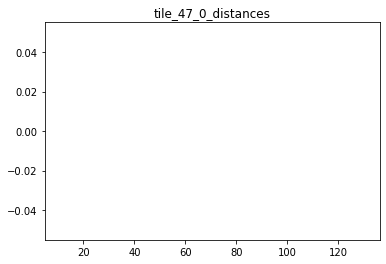

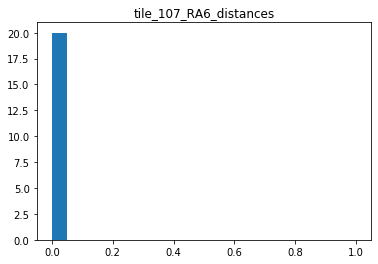

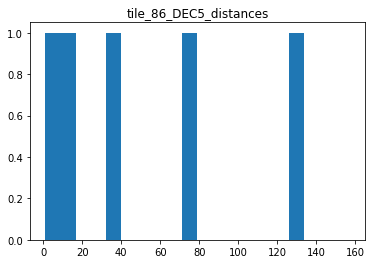

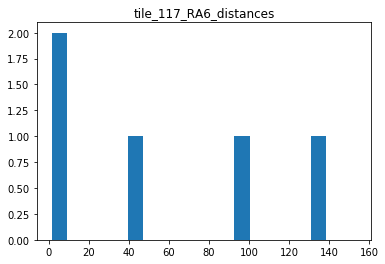

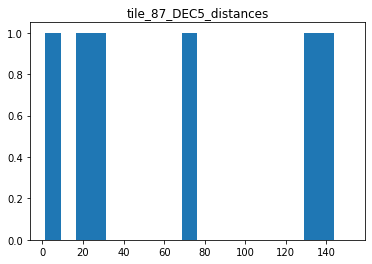

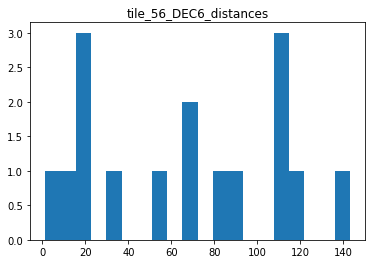

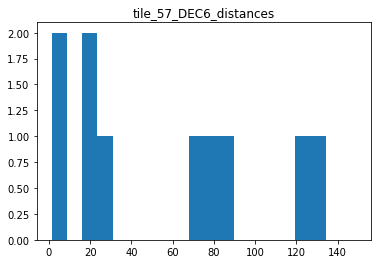

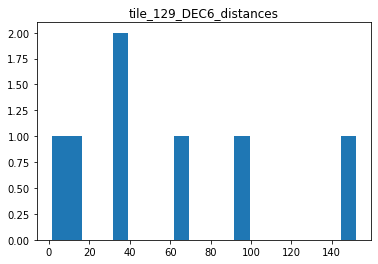

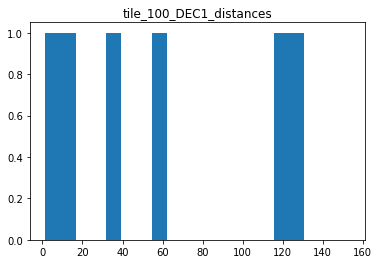

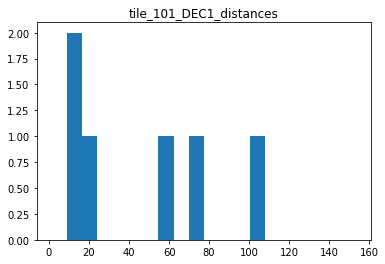

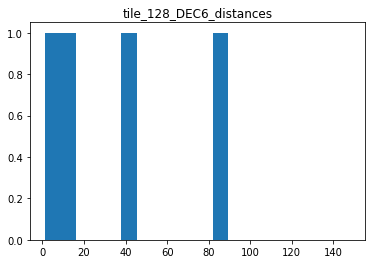

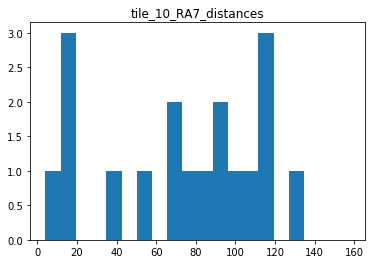

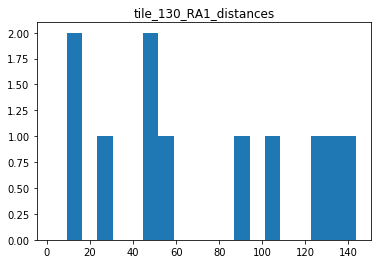

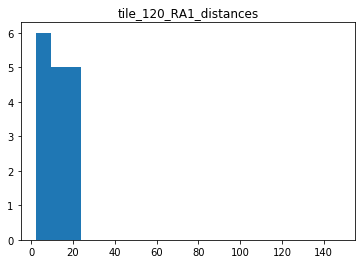

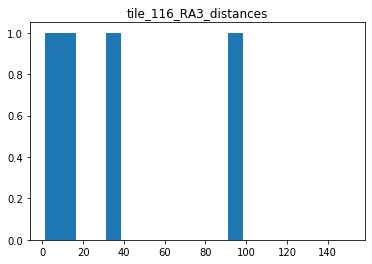

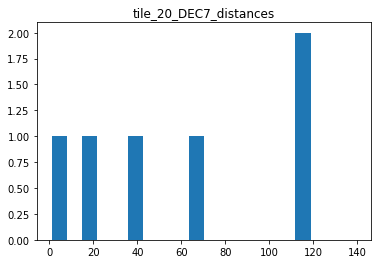

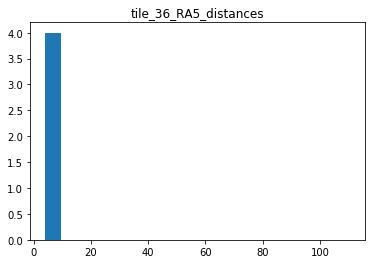

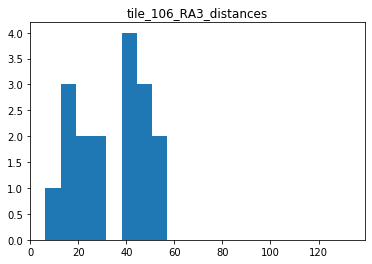

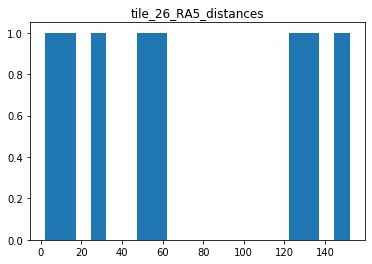

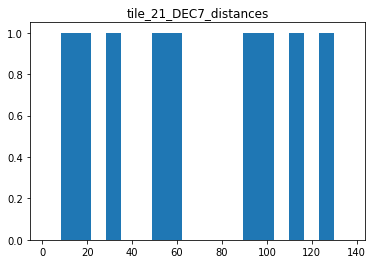

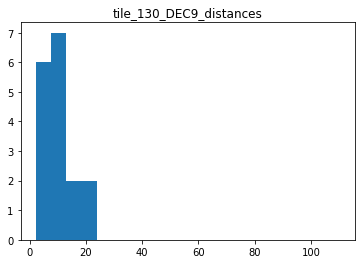

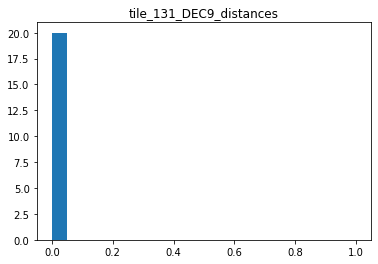

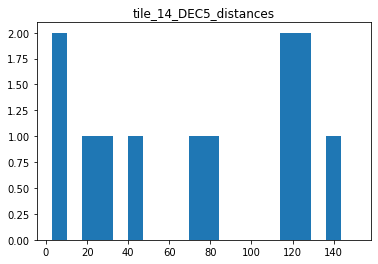

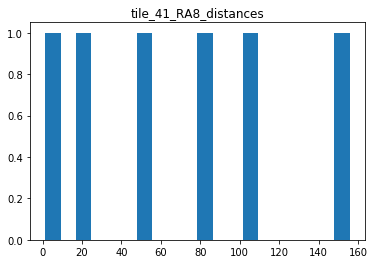

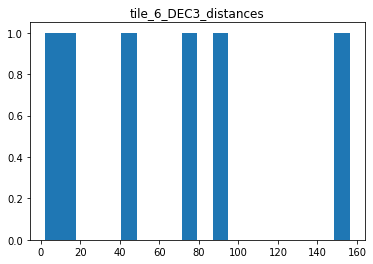

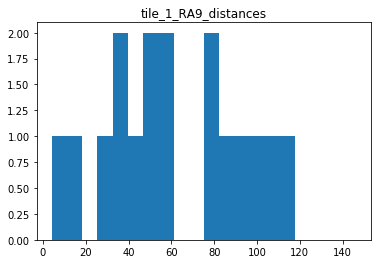

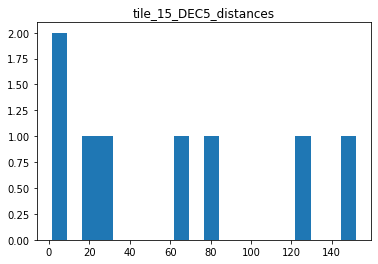

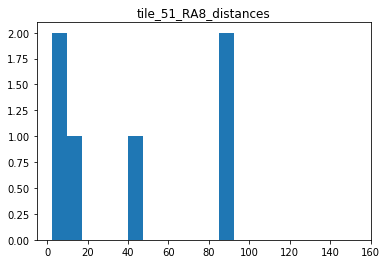

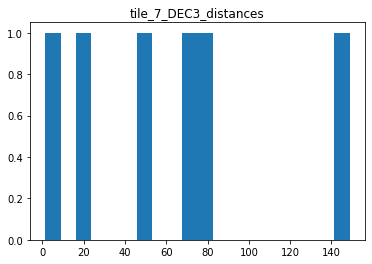

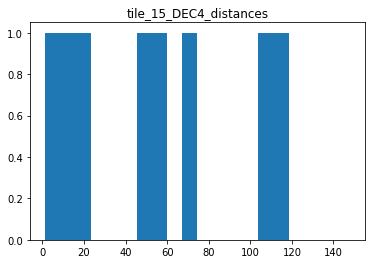

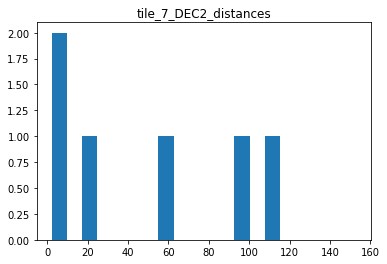

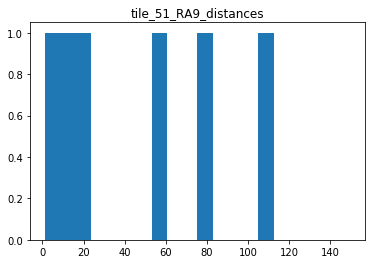

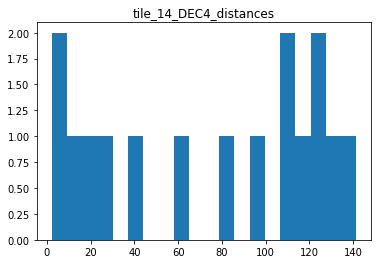

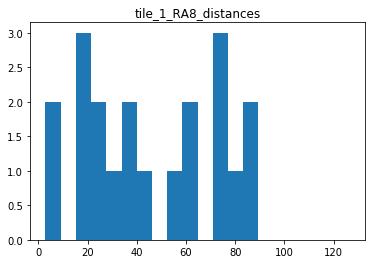

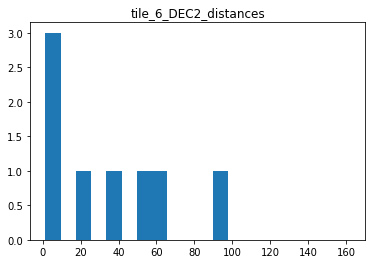

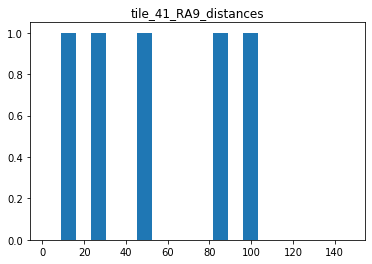

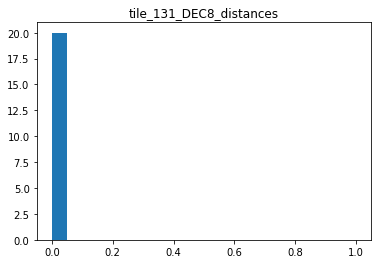

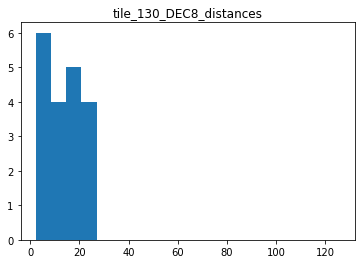

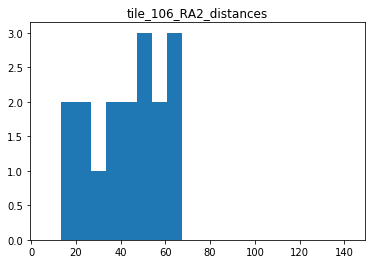

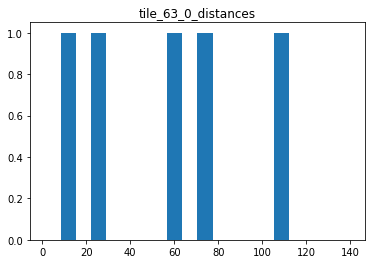

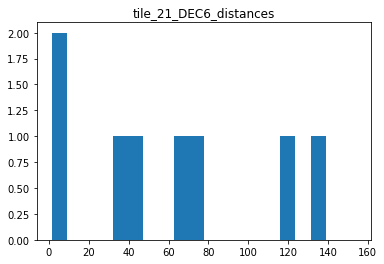

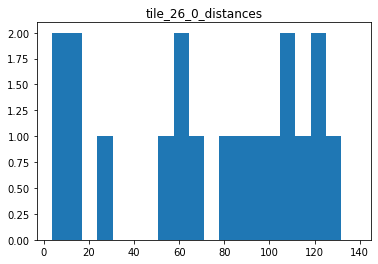

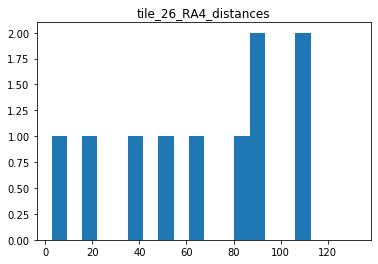

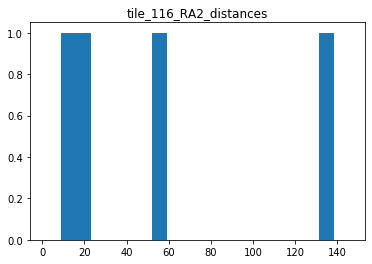

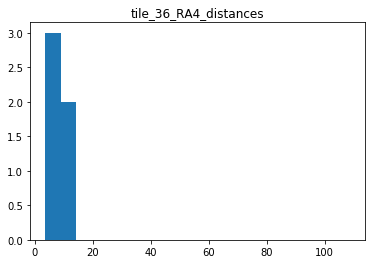

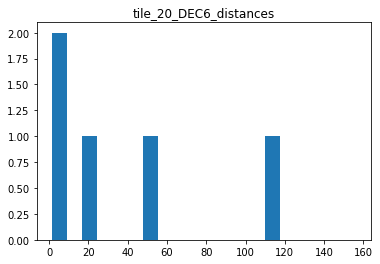

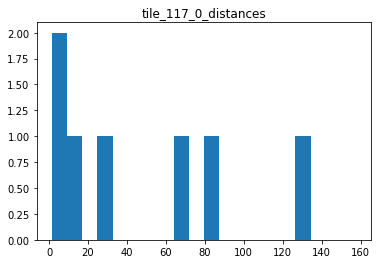

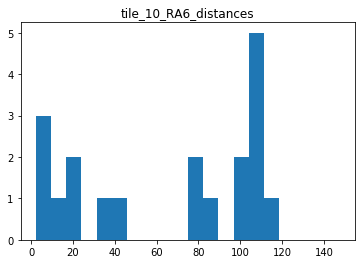

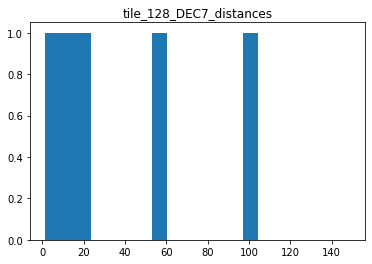

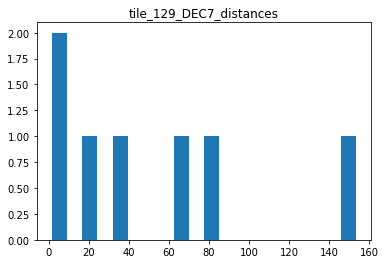

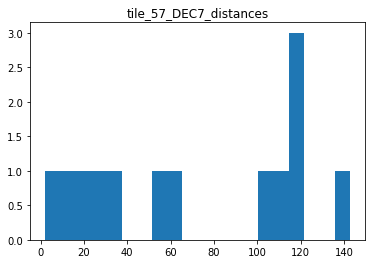

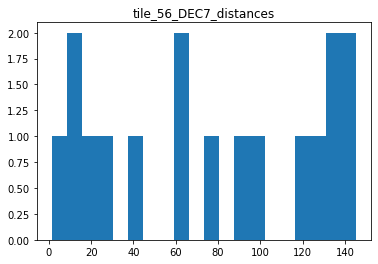

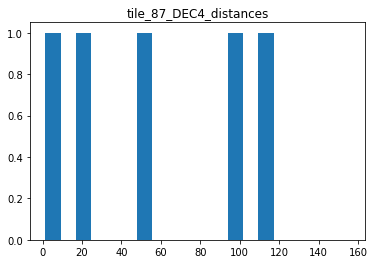

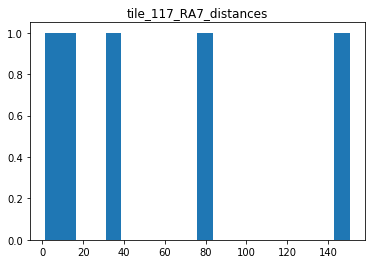

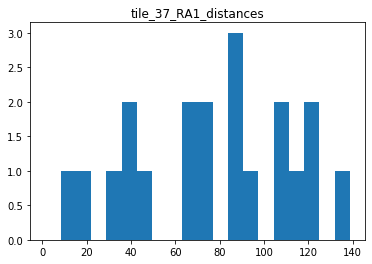

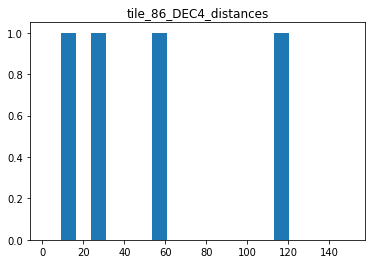

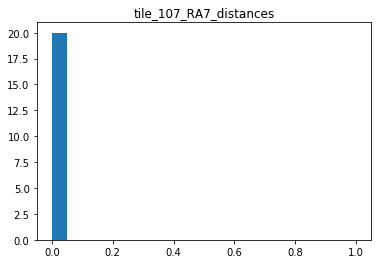

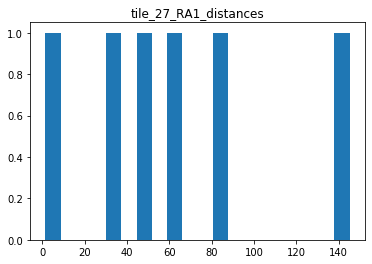

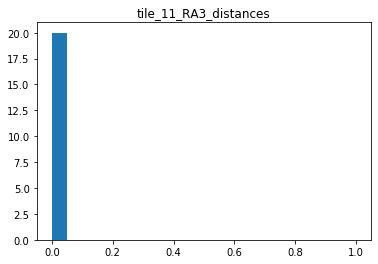

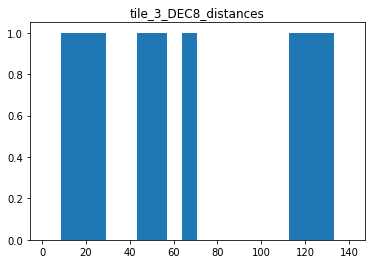

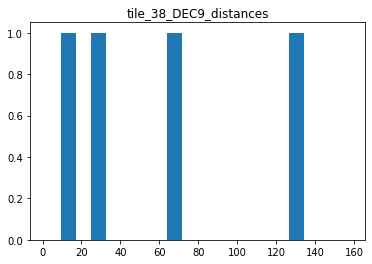

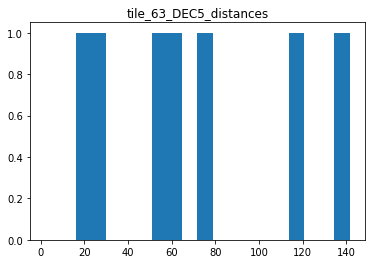

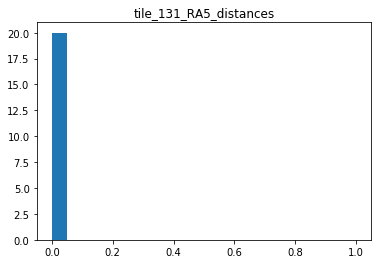

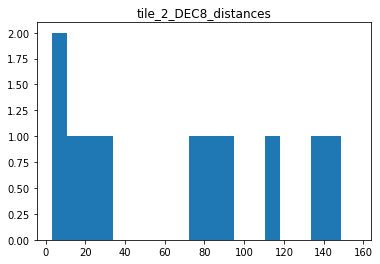

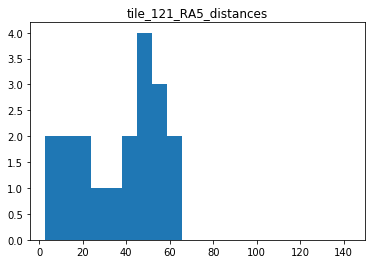

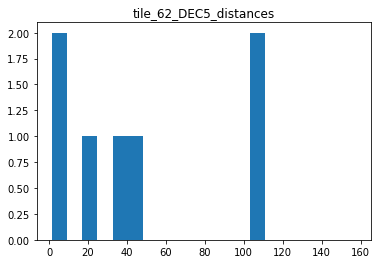

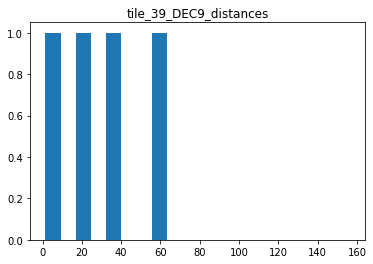

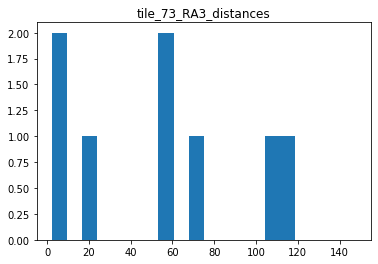

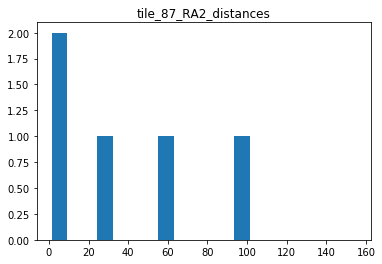

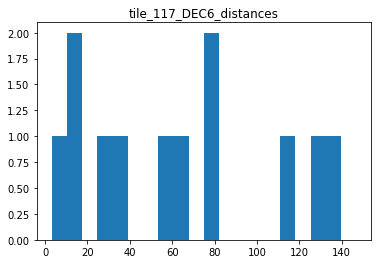

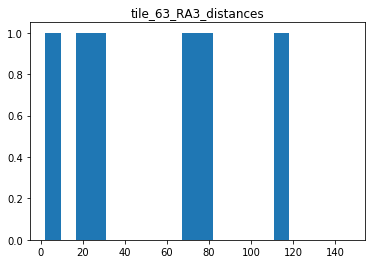

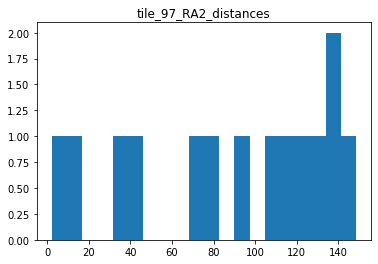

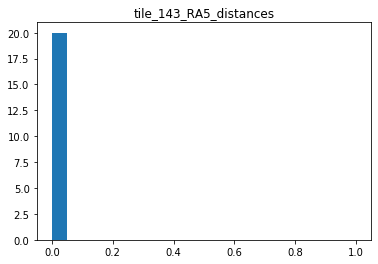

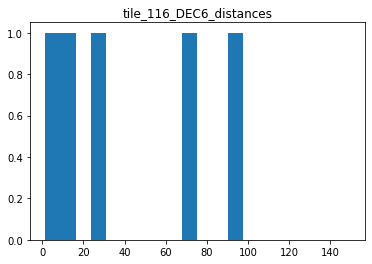

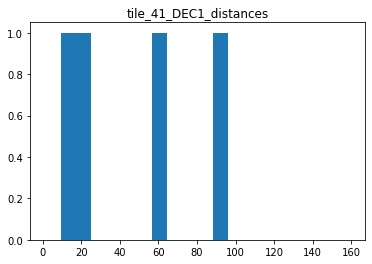

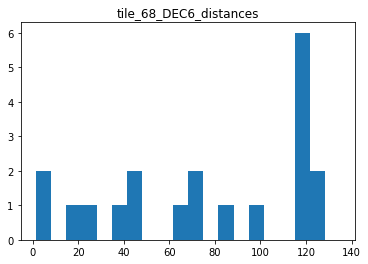

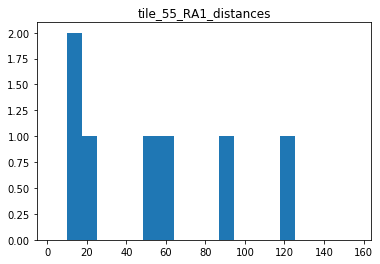

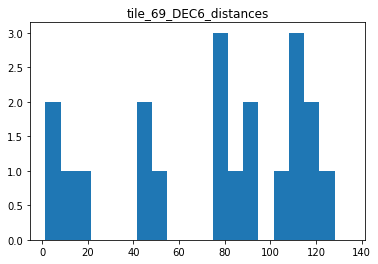

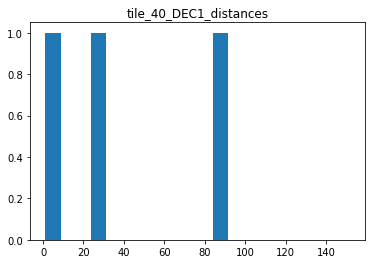

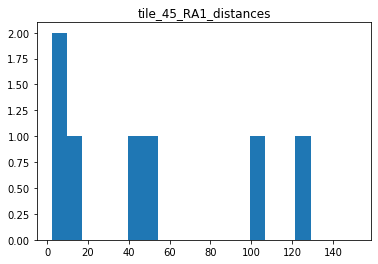

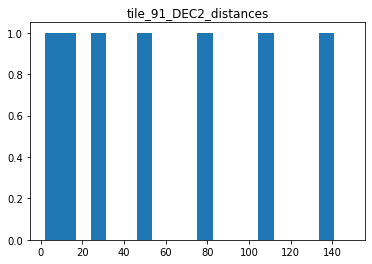

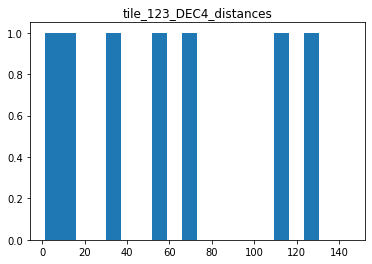

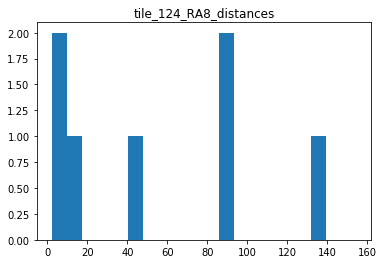

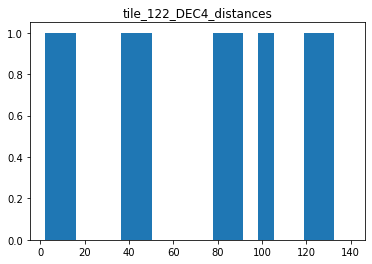

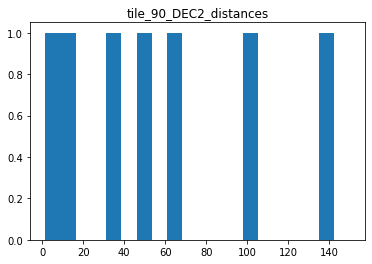

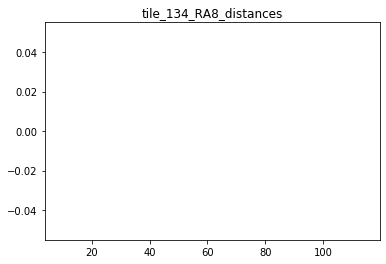

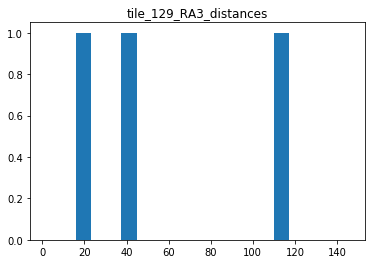

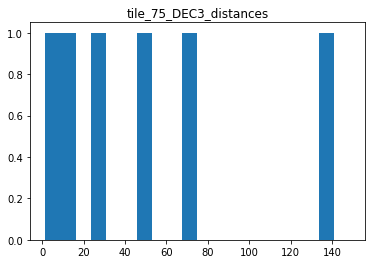

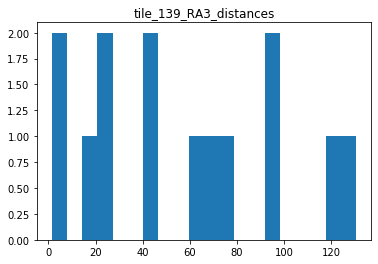

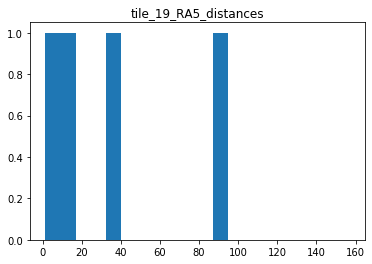

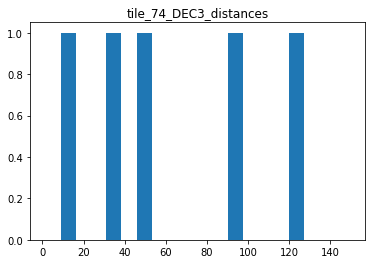

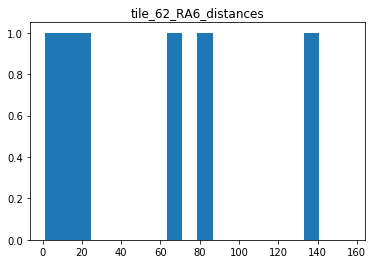

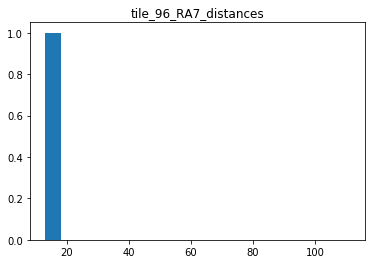

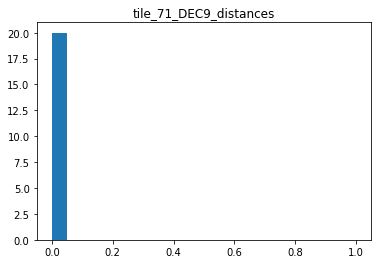

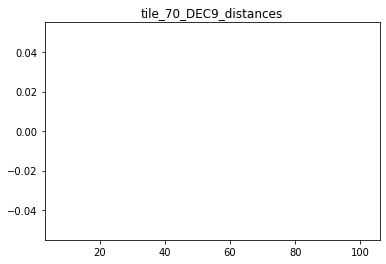

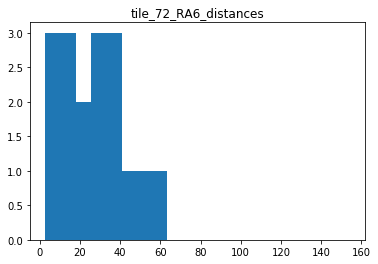

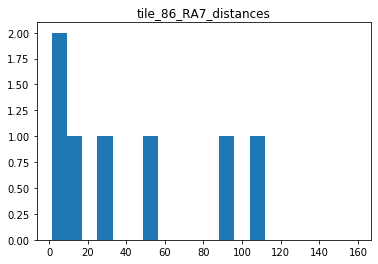

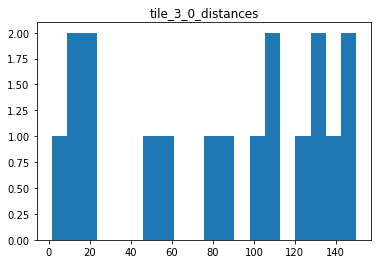

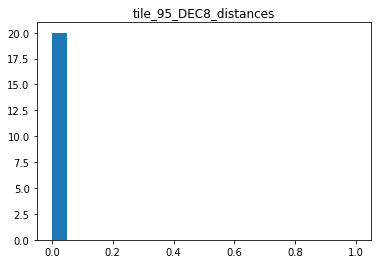

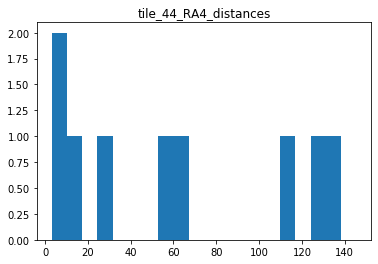

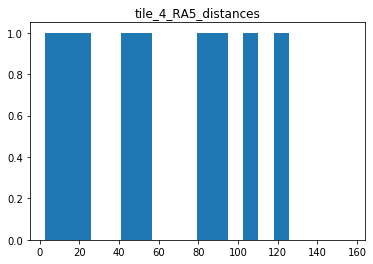

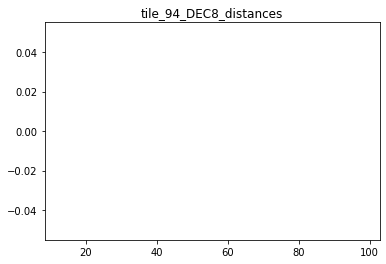

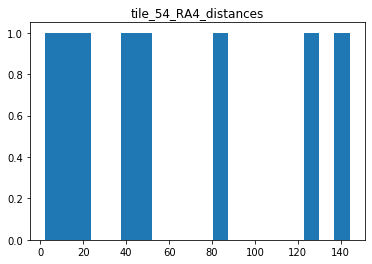

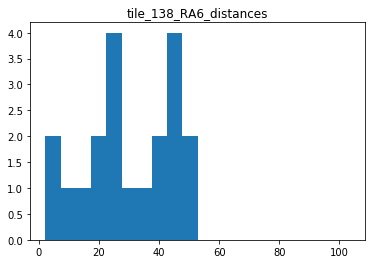

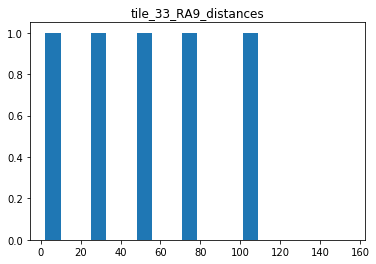

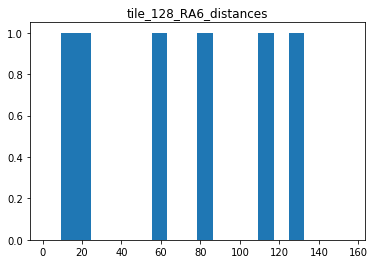

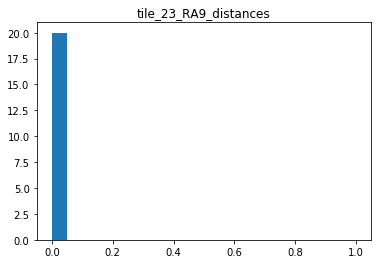

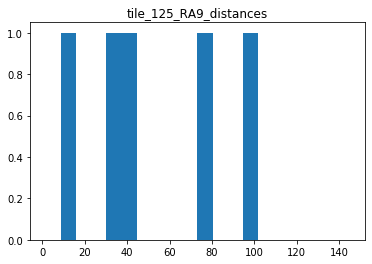

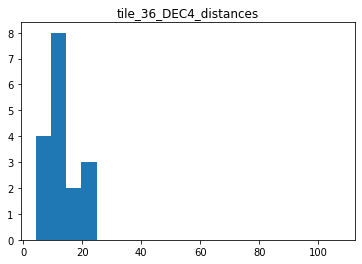

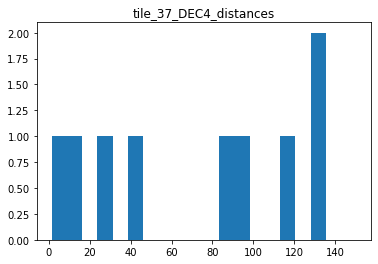

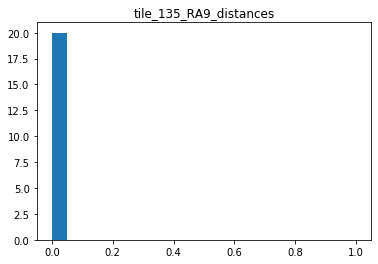

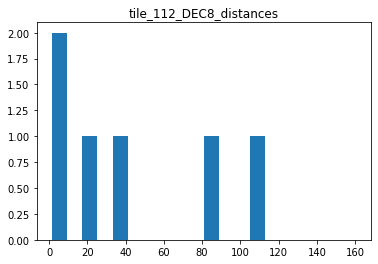

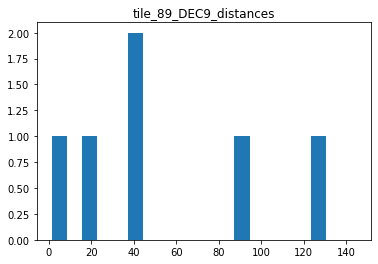

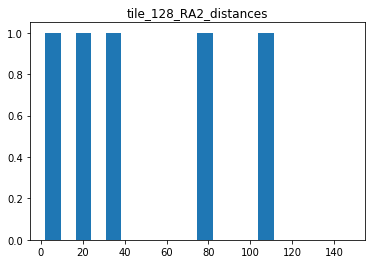

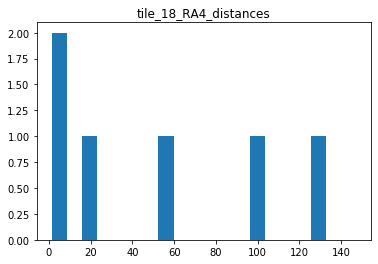

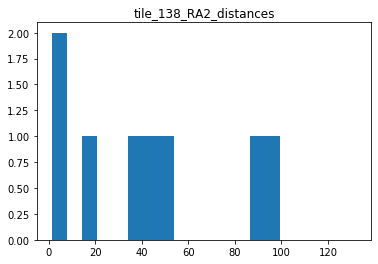

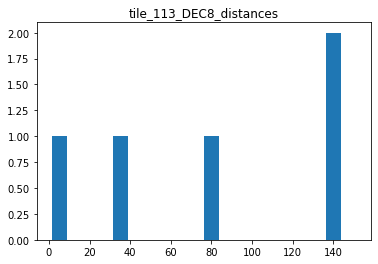

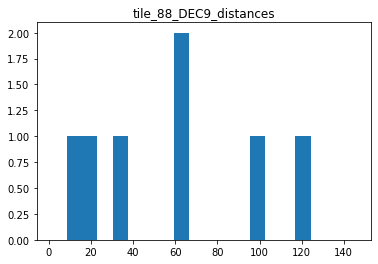

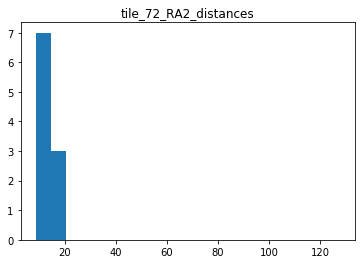

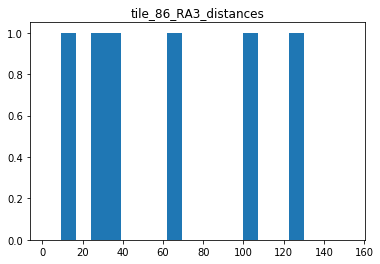

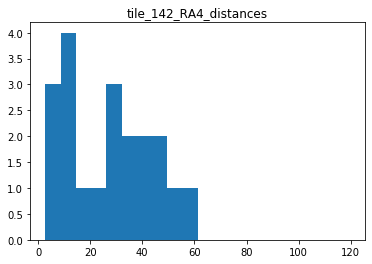

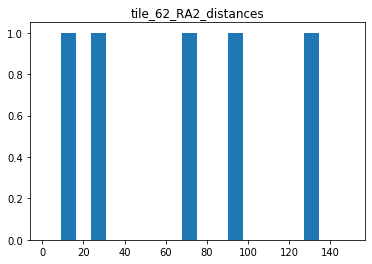

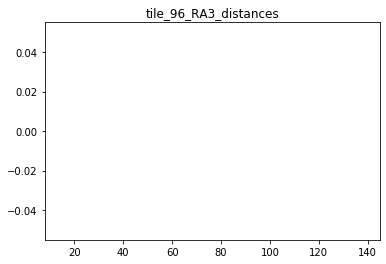

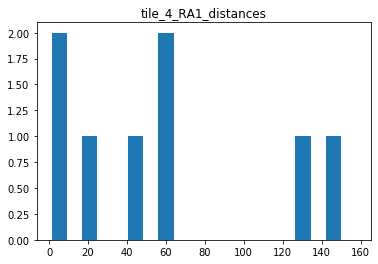

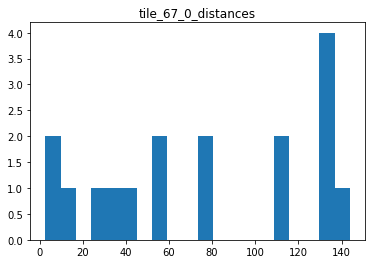

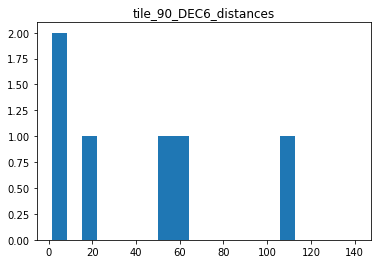

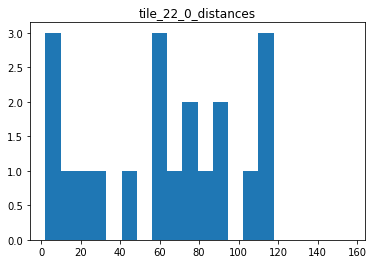

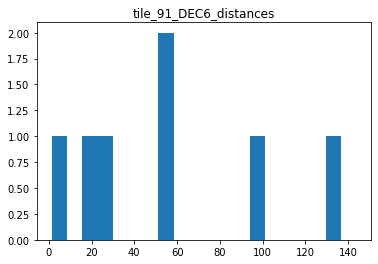

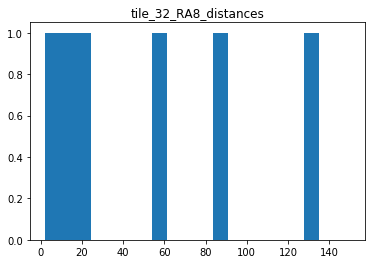

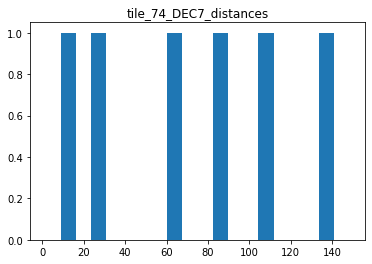

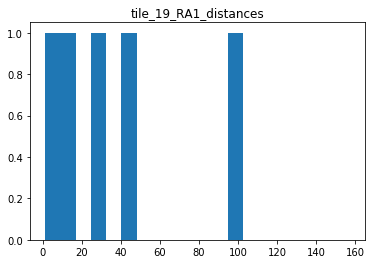

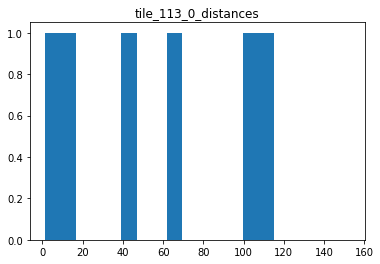

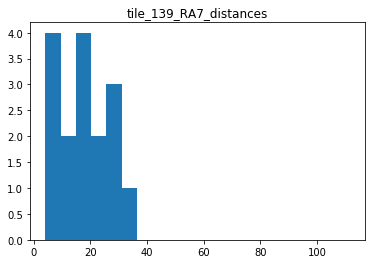

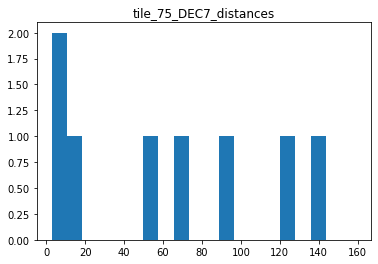

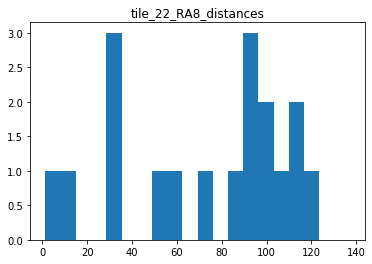

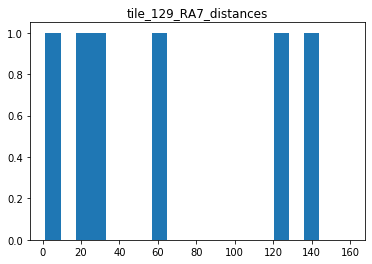

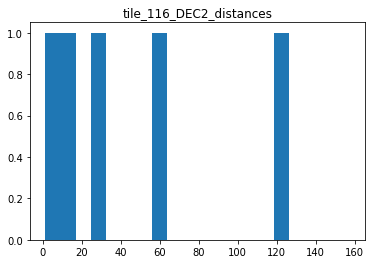

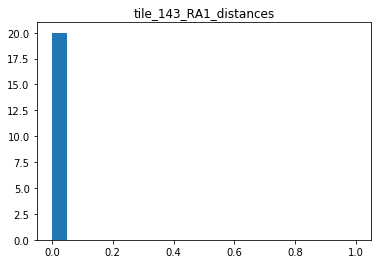

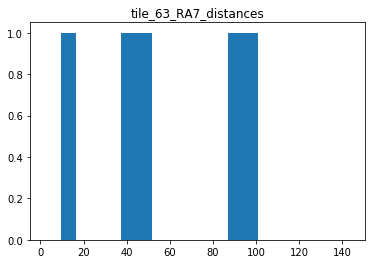

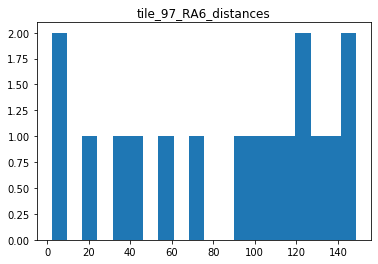

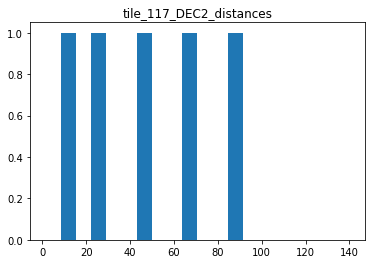

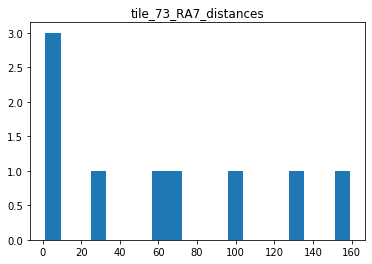

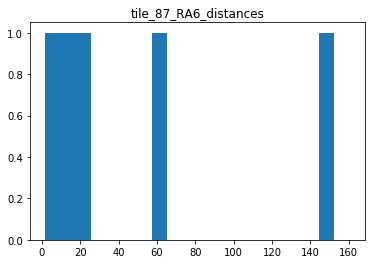

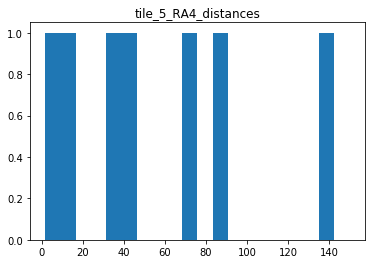

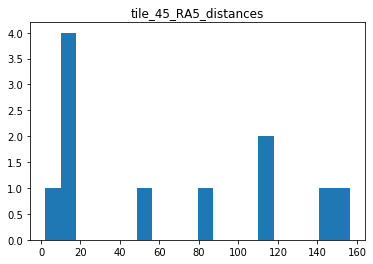

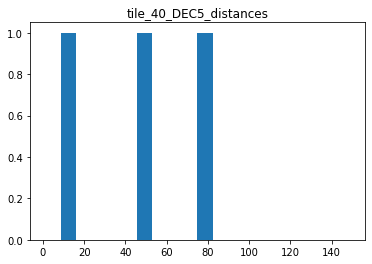

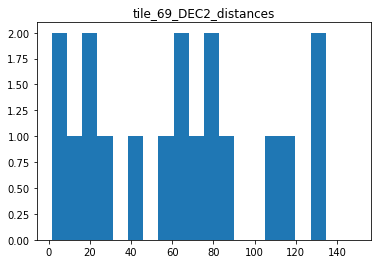

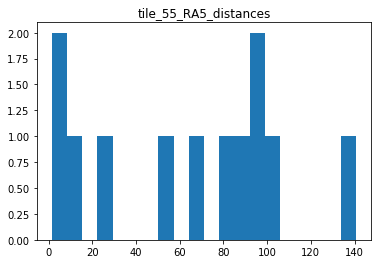

KeyboardInterrupt: 

In [9]:
for tiledata in DistancesAndLabels:

    hist, edges = np.histogram(tiledata[1], bins = 20)
    
    plt.hist(hist,edges)
    plt.title(tiledata[0])
   # plt.plot( np.linspace(0,len(tiledata[1]),len(tiledata[1])),tiledata[1] )
    plt.show()

In [ ]:
tiledata[0]
